# Data Cleaning

In [ ]:
# Import thư viện
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
# Đọc dữ liệu
df = pd.read_excel("/content/iFood.xlsx")
print("Số lượng điểm dữ liệu:", len(df))
df.head()

Số lượng điểm dữ liệu: 2205


,Index,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmpOverall,Response,Complain,Age,Customer_Days,marital_status,education
0,1001,58138,0,0,58,635,88,546,172,88,...,0,0,0,0,1,0,63,2822,Single,Graduation
1,1002,46344,1,1,38,11,1,6,2,1,...,0,0,0,0,0,0,66,2272,Single,Graduation
2,1003,71613,0,0,26,426,49,127,111,21,...,0,0,0,0,0,0,55,2471,Together,Graduation
3,1004,26646,1,0,26,11,4,20,10,3,...,0,0,0,0,0,0,36,2298,Together,Graduation
4,1005,58293,1,0,94,173,43,118,46,27,...,0,0,0,0,0,0,39,2320,Married,PHD


In [ ]:
# Kiểm tra giá trị bị thiếu
print(df.isnull().sum())

Index                  0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntRegularProds        0
MntGoldProds           0
MntTotal               0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmpOverall     0
Response               0
Complain               0
Age                    0
Customer_Days          0
marital_status         0
education              0
dtype: int64


In [ ]:
# Kiểm tra tổng số dòng trùng lặp
print("Tổng số dòng trùng lặp:", df.duplicated().sum())

# Xóa trùng, chỉ giữ lại bản đầu tiên
df = df.drop_duplicates(keep='first')
print("Số dòng sau khi xóa trùng:", len(df))

Tổng số dòng trùng lặp: 0
Số dòng sau khi xóa trùng: 2205


In [ ]:
# Drop cột k cần thiết (drop nếu cần)
df = df.drop(columns=['Index','Complain'])

In [ ]:
# Kích thước dữ liệu
print("Kích thước (rows, cols):", df.shape)

Kích thước (rows, cols): (2205, 28)


# Descriptive Statistics

In [ ]:
# Kích thước dữ liệu
print("Kích thước (rows, cols):", df.shape)

Kích thước (rows, cols): (2205, 28)


In [ ]:
# Thông tin tổng quát về DataFrame
df.info()
# Thống kê mô tả cho biến số
desc_num = df.describe().transpose().reset_index()
desc_num = desc_num.rename(columns={
    "index": "Biến",
    "count": "Obs",
    "mean": "Mean",
    "std": "Std dev",
    "min": "Min",
    "max": "Max"
})
desc_num = desc_num[["Biến","Obs","Mean","Std dev","Min","Max"]].round(2)

# Thống kê mô tả cho biến phân loại
desc_cat = df.describe(include=['object']).transpose().reset_index()
desc_cat = desc_cat.rename(columns={
    "index": "Biến",
    "unique": "Số giá trị khác nhau",
    "top": "Giá trị phổ biến nhất",
    "freq": "Tần suất"
})

# Xuất bảng đẹp với tabulate
from tabulate import tabulate # Import tabulate

print("Thống kê mô tả biến số:")
print(tabulate(desc_num, headers='keys', tablefmt='grid', showindex=False)) # Use tabulate()

print("\nThống kê mô tả biến phân loại:")
print(tabulate(desc_cat, headers='keys', tablefmt='grid', showindex=False)) # Use tabulate()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Income               2205 non-null   int64 
 1   Kidhome              2205 non-null   int64 
 2   Teenhome             2205 non-null   int64 
 3   Recency              2205 non-null   int64 
 4   MntWines             2205 non-null   int64 
 5   MntFruits            2205 non-null   int64 
 6   MntMeatProducts      2205 non-null   int64 
 7   MntFishProducts      2205 non-null   int64 
 8   MntSweetProducts     2205 non-null   int64 
 9   MntRegularProds      2205 non-null   int64 
 10  MntGoldProds         2205 non-null   int64 
 11  MntTotal             2205 non-null   int64 
 12  NumDealsPurchases    2205 non-null   int64 
 13  NumWebPurchases      2205 non-null   int64 
 14  NumCatalogPurchases  2205 non-null   int64 
 15  NumStorePurchases    2205 non-null   int64 
 16  NumWeb

# EDA

In [ ]:
# Lưu DataFrame đã xử lý vào tệp Excel
output_path = "iFood_processed.xlsx"
df.to_excel(output_path, index=False)

# Cung cấp liên kết tải xuống
from google.colab import files
files.download(output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

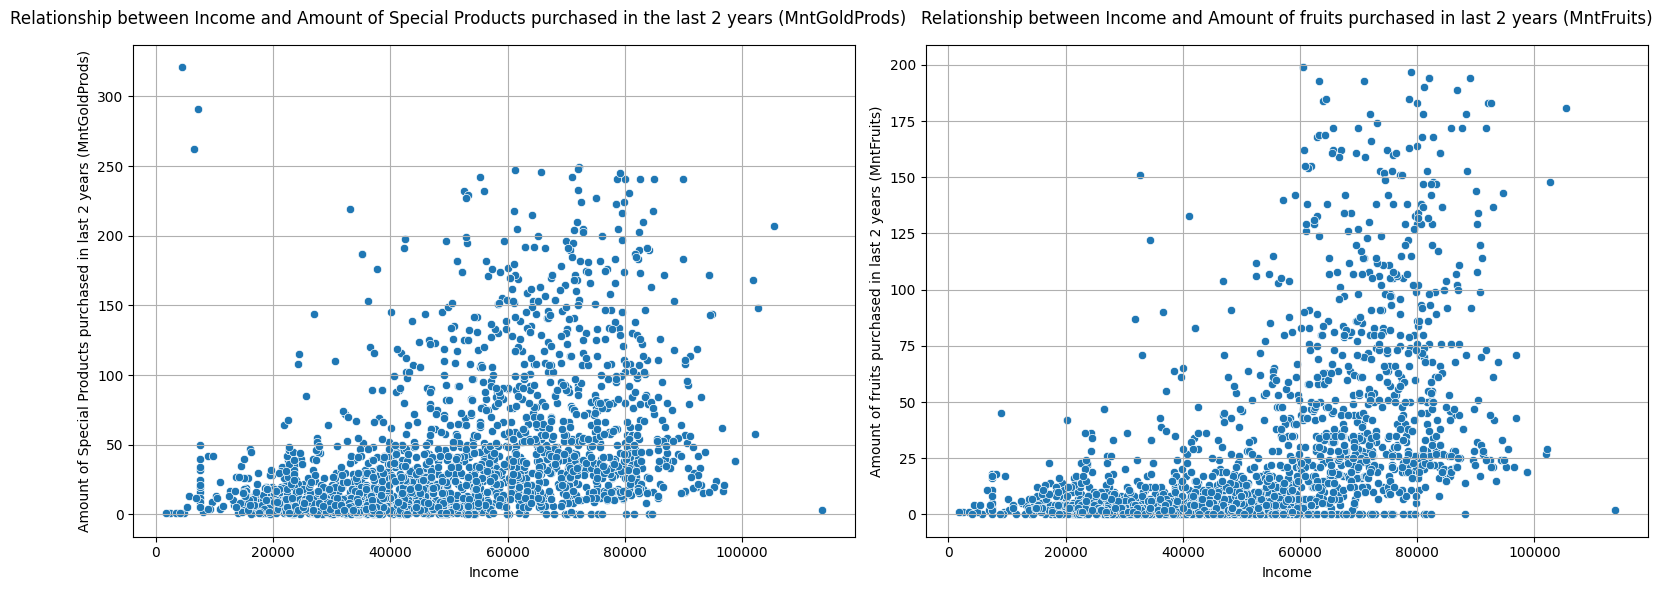

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo figure và axes cho 2 biểu đồ con
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ scatter plot cho Income và MntGoldProds trên axes thứ nhất
sns.scatterplot(data=df, x='Income', y='MntGoldProds', ax=axes[0])
axes[0].set_title(
    'Relationship between Income and Amount of Special Products purchased in the last 2 years (MntGoldProds)',
    pad=15,
    x=0.45   # dịch sang phải (mặc định là 0.5)
)
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Amount of Special Products purchased in last 2 years (MntGoldProds)')
axes[0].grid(True)

# Biểu đồ scatter plot cho Income và MntFruits trên axes thứ hai
sns.scatterplot(data=df, x='Income', y='MntFruits', ax=axes[1])
axes[1].set_title(
    'Relationship between Income and Amount of fruits purchased in last 2 years (MntFruits)',
    pad=15,
    x=0.5   # dịch sang trái (mặc định là 0.5)
)
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Amount of fruits purchased in last 2 years (MntFruits)')
axes[1].grid(True)

# Hiển thị các biểu đồ
plt.tight_layout() # Điều chỉnh khoảng cách giữa các biểu đồ con
plt.show()

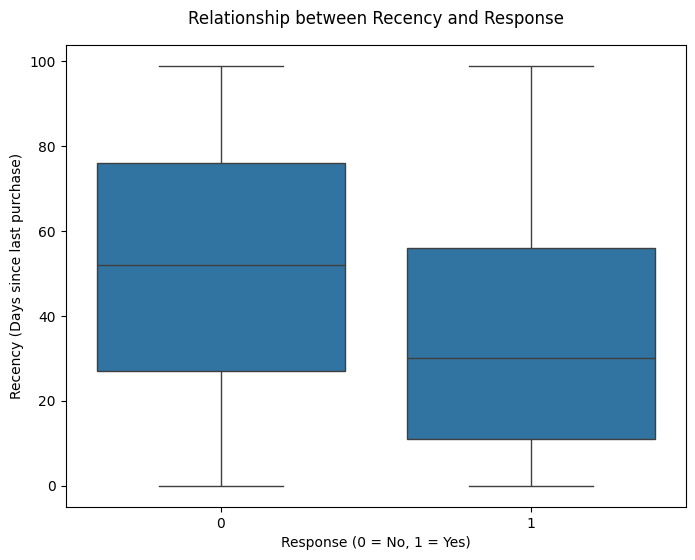

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Response', y='Recency')

plt.title('Relationship between Recency and Response', pad=15)
plt.xlabel('Response (0 = No, 1 = Yes)')
plt.ylabel('Recency (Days since last purchase)')
plt.show()

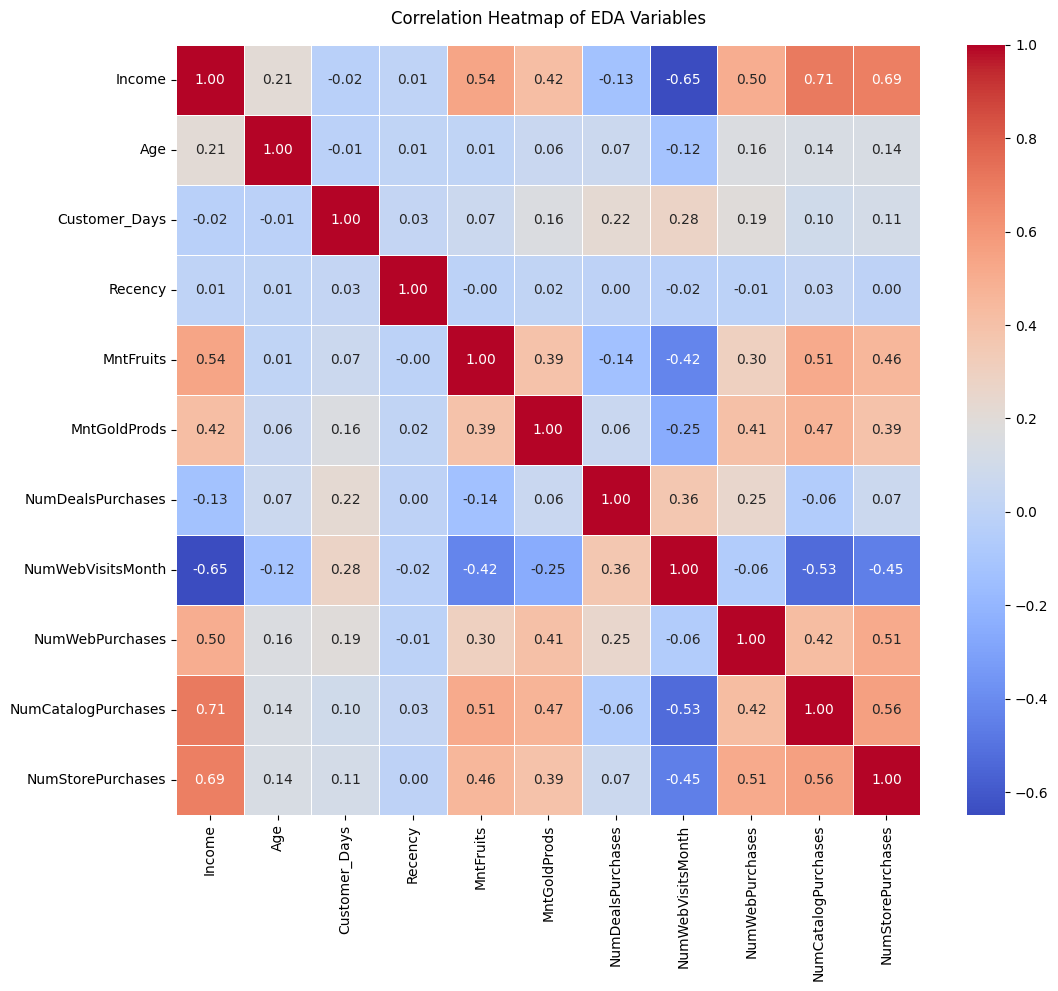

In [ ]:
# Chọn các biến số cần hiển thị trên biểu đồ Correlation Heatmap
selected_vars = ['Income', 'Age', 'Customer_Days', 'Recency', 'MntFruits', 'MntGoldProds', 'NumDealsPurchases', 'NumWebVisitsMonth', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Tính ma trận tương quan
correlation_matrix = df[selected_vars].corr()

# Vẽ biểu đồ Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of EDA Variables', pad=15)
plt.show()

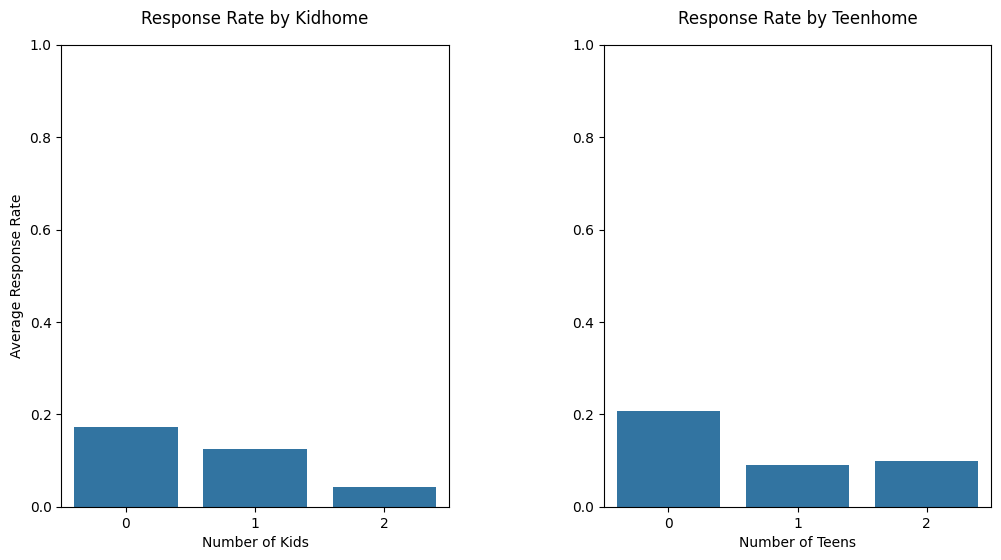

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Biểu đồ Kidhome
kid_resp = df.groupby('Kidhome')['Response'].mean().reset_index()
sns.barplot(data=kid_resp, x='Kidhome', y='Response', ax=axes[0])
axes[0].set_title('Response Rate by Kidhome', pad=15)
axes[0].set_xlabel('Number of Kids')
axes[0].set_ylabel('Average Response Rate')

# Biểu đồ Teenhome
teen_resp = df.groupby('Teenhome')['Response'].mean().reset_index()
sns.barplot(data=teen_resp, x='Teenhome', y='Response', ax=axes[1])
axes[1].set_title('Response Rate by Teenhome', pad=15)
axes[1].set_xlabel('Number of Teens')
axes[1].set_ylabel('')

for ax in axes:
    ax.set_ylim(0, 1)

plt.subplots_adjust(wspace=0.4)
plt.show()

MntFruits: 245 outliers (11.11%)
MntGoldProds: 204 outliers (9.25%)


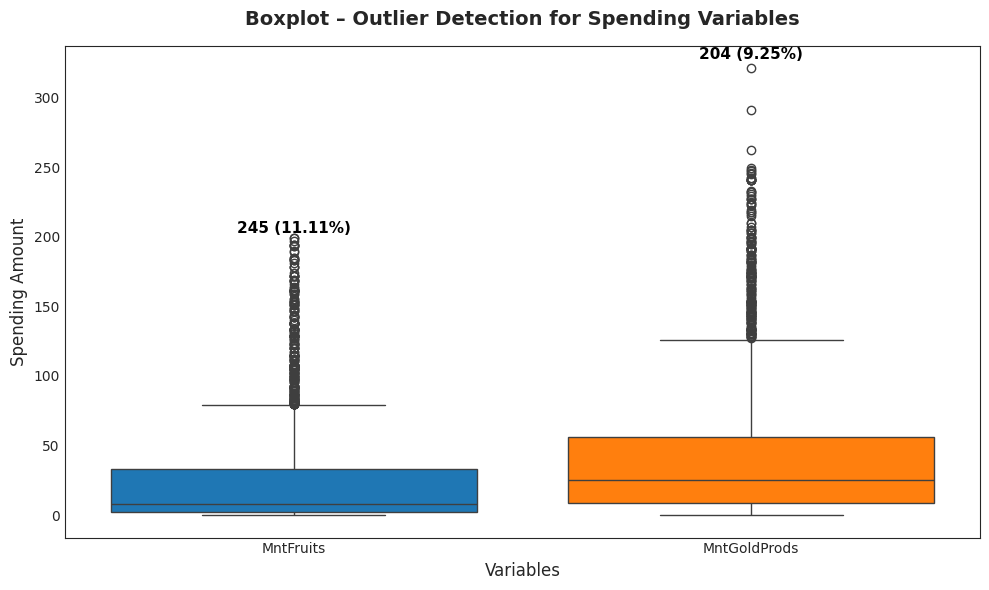

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

spending_vars = ['MntFruits', 'MntGoldProds']

# Thiết lập kích thước và style
plt.figure(figsize=(10, 6))

# Bỏ grid và viền nền mờ
sns.set_style("white")  # bỏ background grid
plt.box(True)          # bỏ khung xung quanh

# Vẽ boxplot
ax = sns.boxplot(data=df[spending_vars],
                 linewidth=1,  # viền box rõ hơn
                 saturation=1,
                 showmeans=False)

# Tiêu đề và nhãn
plt.title("Boxplot – Outlier Detection for Spending Variables",
          fontsize=14, fontweight='bold', pad=15)
plt.ylabel("Spending Amount", fontsize=12)
plt.xlabel("Variables", fontsize=12)

# --- Tính toán và hiển thị số lượng/tỷ lệ outlier ---
for i, var in enumerate(spending_vars):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR

    outliers = df[(df[var] < lower) | (df[var] > upper)][var]
    count = len(outliers)
    percent = count / len(df) * 100

    # In ra console
    print(f"{var}: {count} outliers ({percent:.2f}%)")

    # Gắn nhãn trên boxplot
    ax.text(i, df[var].max() * 1.02,
            f"{count} ({percent:.2f}%)",
            ha='center', fontsize=11, fontweight='bold', color='black')

# Bỏ các đường ngang nhỏ (minor ticks)
ax.tick_params(axis='both', which='both', length=0)

plt.tight_layout()
plt.show()

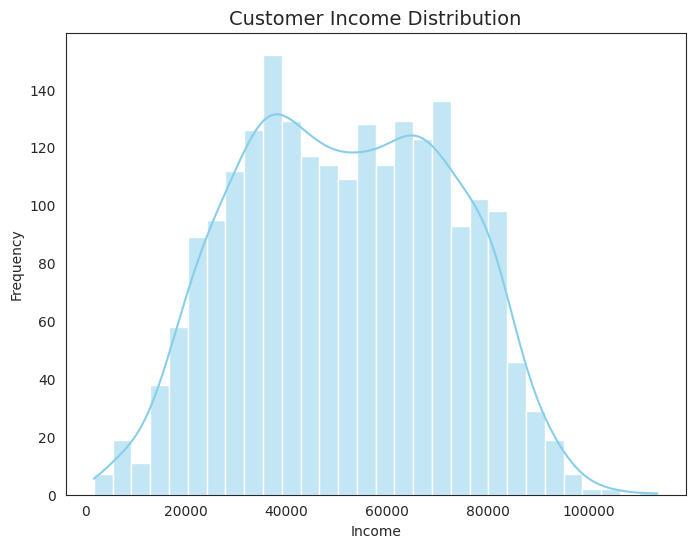

In [ ]:
# Phân bố thu nhập khách hàng (Income) - Histogram
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(df["Income"], bins=30, kde=True, color="skyblue")

plt.title("Customer Income Distribution", fontsize=14)
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

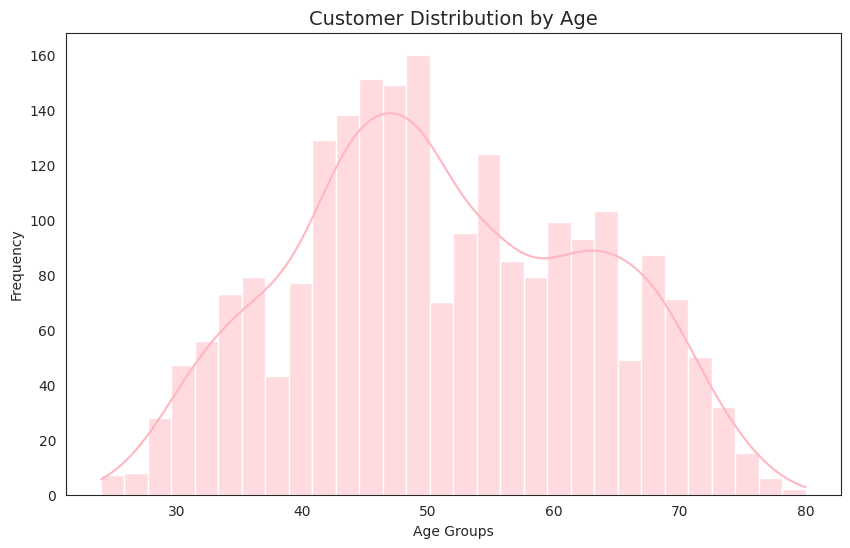

In [ ]:
#Phân bố khách hàng theo độ tuổi (Age)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30, color='lightpink')
plt.title("Customer Distribution by Age", fontsize=14)
plt.xlabel("Age Groups")
plt.ylabel("Frequency")
plt.show()

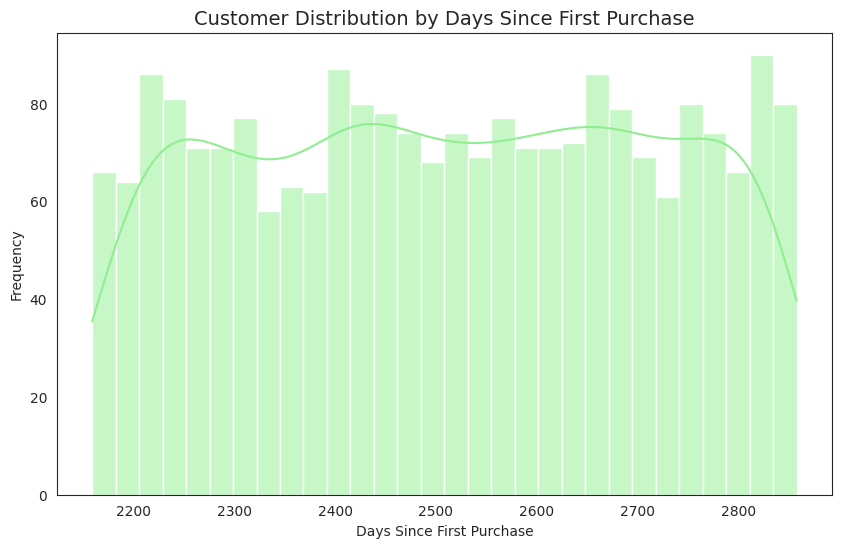

In [ ]:
# Phân bố số ngày khách hàng gắn bó (Customer_Days)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Customer_Days'], kde=True, bins=30, color='lightgreen')
plt.title("Customer Distribution by Days Since First Purchase", fontsize=14)
plt.xlabel("Days Since First Purchase")
plt.ylabel("Frequency")
plt.show()

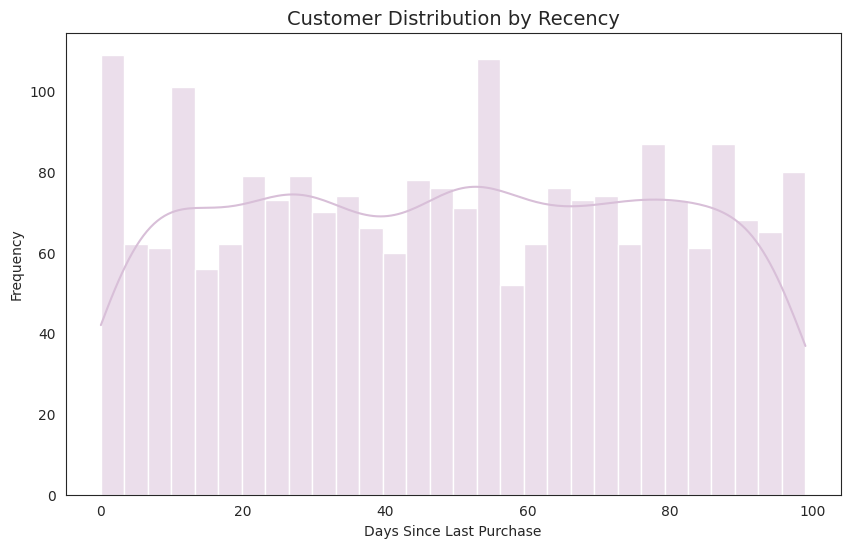

In [ ]:
# Phân bố số ngày kể từ lần mua cuối cùng (Recency)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Recency'], kde=True, bins=30, color='thistle')
plt.title("Customer Distribution by Recency", fontsize=14)
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Frequency")
plt.show()

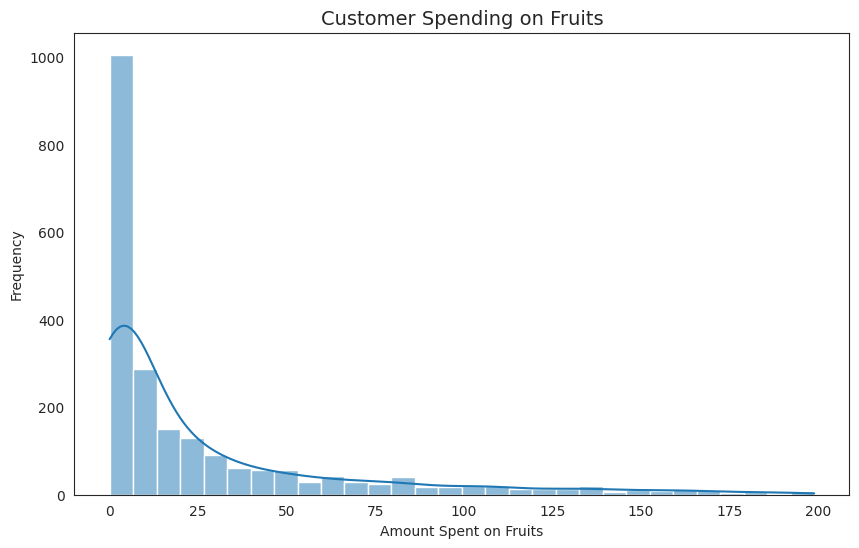

In [ ]:
# Phân bố chi tiêu cho MntFruits
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['MntFruits'], kde=True, bins=30)
plt.title("Customer Spending on Fruits", fontsize=14)
plt.xlabel("Amount Spent on Fruits")
plt.ylabel("Frequency")
plt.show()

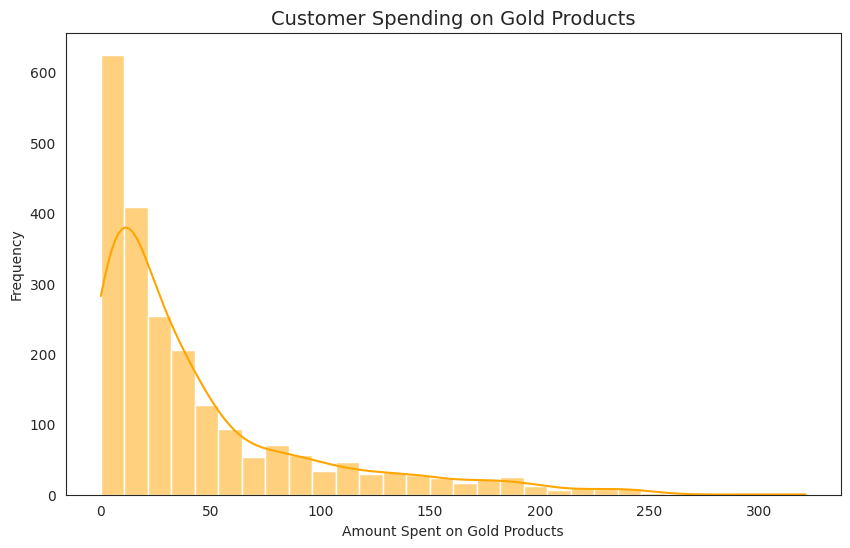

In [ ]:
# Phân bố chi tiêu cho MntGoldProds
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['MntGoldProds'], kde=True, bins=30, color='orange')
plt.title("Customer Spending on Gold Products", fontsize=14)
plt.xlabel("Amount Spent on Gold Products")
plt.ylabel("Frequency")
plt.show()

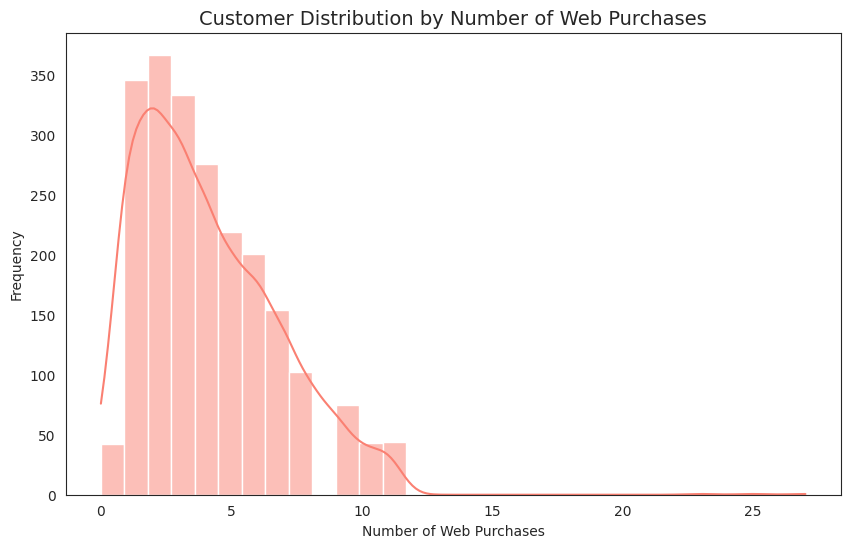

In [ ]:
# Phân bố số lần mua hàng qua Web (NumWebPurchases)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['NumWebPurchases'], kde=True, bins=30, color='salmon')
plt.title("Customer Distribution by Number of Web Purchases", fontsize=14)
plt.xlabel("Number of Web Purchases")
plt.ylabel("Frequency")
plt.show()

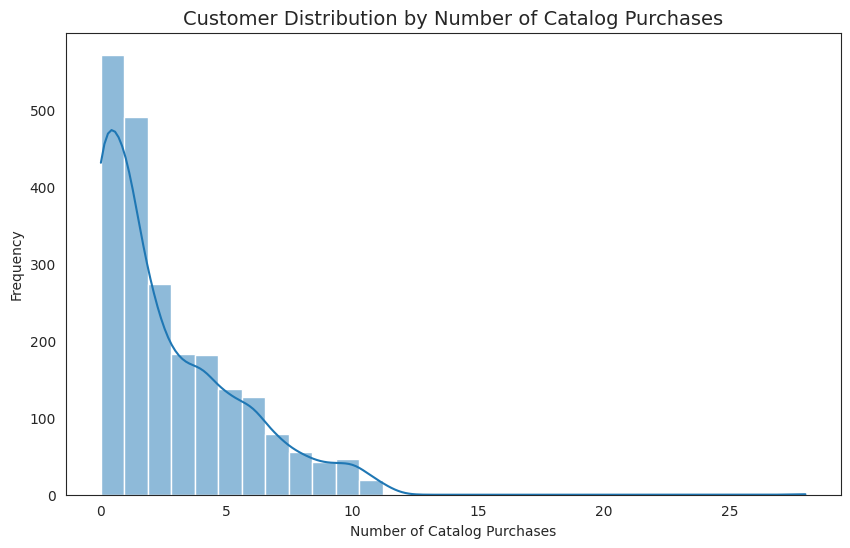

In [ ]:
# Phân bố số lần mua hàng qua Catalog (NumCatalogPurchases)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['NumCatalogPurchases'], kde=True, bins=30)
plt.title("Customer Distribution by Number of Catalog Purchases", fontsize=14)
plt.xlabel("Number of Catalog Purchases")
plt.ylabel("Frequency")
plt.show()

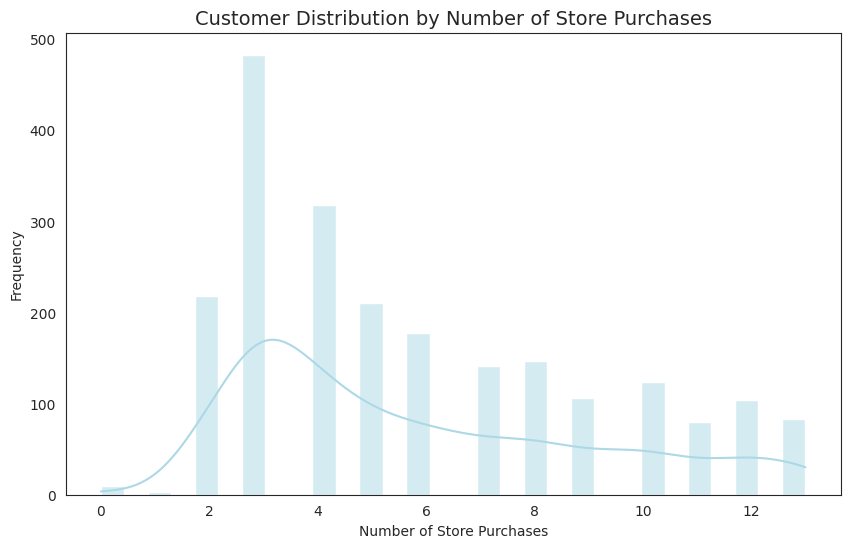

In [ ]:
# Phân bố số lần mua hàng qua Store (NumStorePurchases)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['NumStorePurchases'], kde=True, bins=30, color='lightblue')
plt.title("Customer Distribution by Number of Store Purchases", fontsize=14)
plt.xlabel("Number of Store Purchases")
plt.ylabel("Frequency")
plt.show()

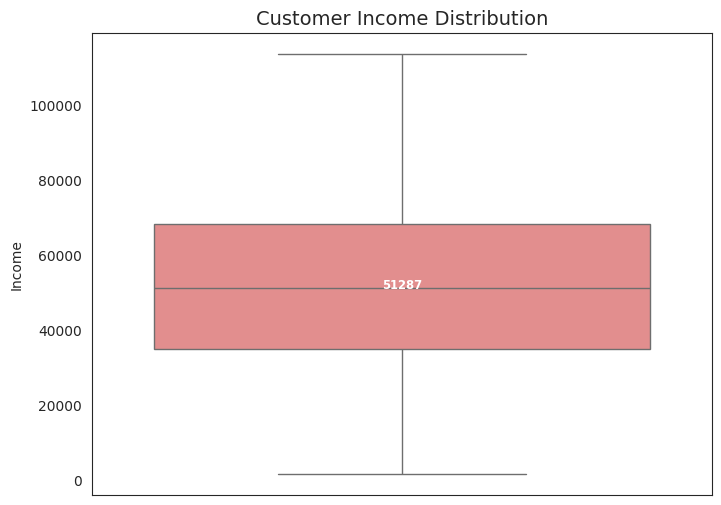

In [ ]:
# Box plot for Income
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.boxplot(y=df['Income'], color='lightcoral')
plt.title("Customer Income Distribution", fontsize=14)
plt.ylabel("Income")

# Add median value
median_value = df['Income'].median()
ax.text(0, median_value, f'{median_value:.0f}',
        horizontalalignment='center', size='small', color='white', weight='semibold')

plt.show()

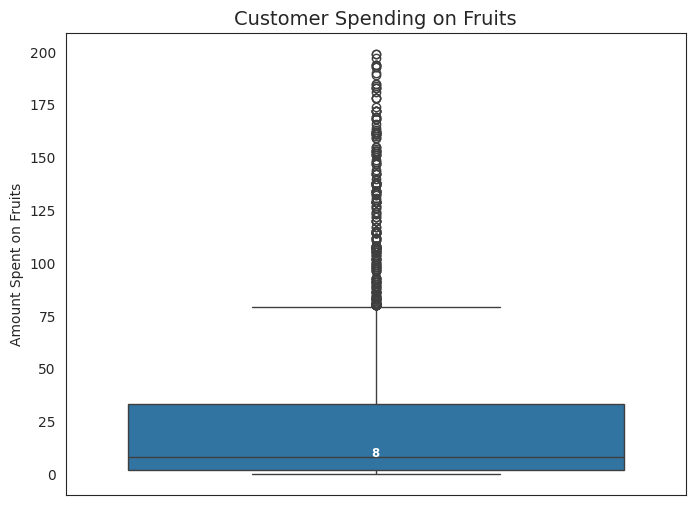

In [ ]:
# Box plot for MntFruits
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.boxplot(y=df['MntFruits'])
plt.title("Customer Spending on Fruits", fontsize=14)
plt.ylabel("Amount Spent on Fruits")

# Add median value
median_value = df['MntFruits'].median()
ax.text(0, median_value, f'{median_value:.0f}',
        horizontalalignment='center', size='small', color='white', weight='semibold')

plt.show()

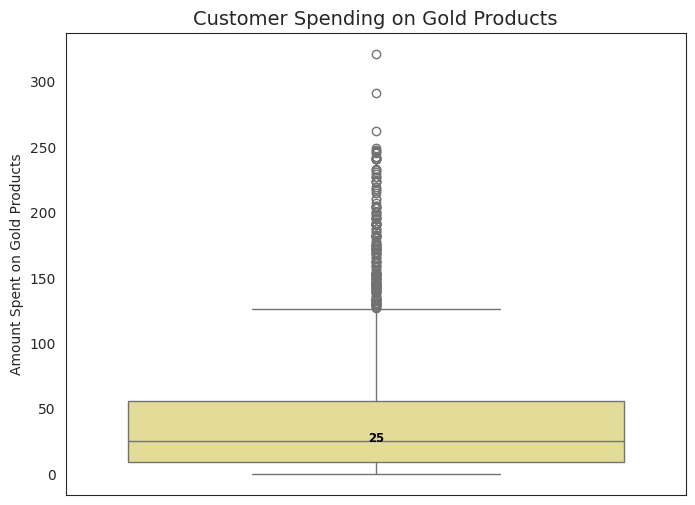

In [ ]:
# Box plot for MntGoldProds
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.boxplot(y=df['MntGoldProds'], color='khaki')
plt.title("Customer Spending on Gold Products", fontsize=14)
plt.ylabel("Amount Spent on Gold Products")

# Add median value
median_value = df['MntGoldProds'].median()
ax.text(0, median_value, f'{median_value:.0f}',
        horizontalalignment='center', size='small', color='black', weight='semibold')

plt.show()

# Feature Engineering

In [ ]:
# Living_With
if "marital_status" in df.columns:
    df["Living_With"] = df["marital_status"].replace({
        "Married":"Partner","Together":"Partner",
        "Absurd":"Alone","Widow":"Alone","YOLO":"Alone","Divorced":"Alone","Single":"Alone"
    })

# Children / Parent
if {"Kidhome","Teenhome"}.issubset(df.columns):
    df["Children"] = df["Kidhome"] + df["Teenhome"]
    df["Is_Parent"] = (df["Children"] > 0).astype(int)

# Family_Size
if "Living_With" in df.columns and "Children" in df.columns:
    df["Family_Size"] = df["Living_With"].replace({"Alone":1,"Partner":2}) + df["Children"]

# Education grouping
if "education" in df.columns:
    df["education"] = df["education"].replace({
        "Basic":"Undergraduate","2n Cycle":"Undergraduate",
        "Graduation":"Graduate","Master":"Postgraduate","PhD":"Postgraduate"
    })

# Ratios theo kênh (không cần tạo NumTotalPurchases)
pcols = [c for c in ["NumWebPurchases","NumCatalogPurchases","NumStorePurchases"] if c in df.columns]
if len(pcols) == 3:
    denom = df[pcols].sum(axis=1)
    # tránh chia 0
    safe_denom = denom.replace(0, np.nan)
    df["Ratio_NumWebPurchases"]     = (df["NumWebPurchases"]    / safe_denom).fillna(0)
    df["Ratio_NumCatalogPurchases"] = (df["NumCatalogPurchases"]/ safe_denom).fillna(0)
    df["Ratio_NumStorePurchases"]   = (df["NumStorePurchases"]  / safe_denom).fillna(0)
print("After FE:", df.shape)

After FE: (2205, 35)


/tmp/ipython-input-72679791.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Family_Size"] = df["Living_With"].replace({"Alone":1,"Partner":2}) + df["Children"]


# Data Preprocessing

In [ ]:
# Kích thước dữ liệu
print("Kích thước (rows, cols):", df.shape)

Kích thước (rows, cols): (2205, 35)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Income                     2205 non-null   int64  
 1   Kidhome                    2205 non-null   int64  
 2   Teenhome                   2205 non-null   int64  
 3   Recency                    2205 non-null   int64  
 4   MntWines                   2205 non-null   int64  
 5   MntFruits                  2205 non-null   int64  
 6   MntMeatProducts            2205 non-null   int64  
 7   MntFishProducts            2205 non-null   int64  
 8   MntSweetProducts           2205 non-null   int64  
 9   MntRegularProds            2205 non-null   int64  
 10  MntGoldProds               2205 non-null   int64  
 11  MntTotal                   2205 non-null   int64  
 12  NumDealsPurchases          2205 non-null   int64  
 13  NumWebPurchases            2205 non-null   int64

## Handling Outliers

Báo cáo winsorization (các biến chi tiêu):
                    lower   upper  n_capped  pct_capped
MntWines          -700.5  1231.5      34.0        1.54
MntMeatProducts   -308.0   556.0     170.0        7.71
MntRegularProds  -1221.0  2147.0       4.0        0.18
MntFishProducts    -67.5   120.5     222.0       10.07
MntSweetProducts   -48.5    83.5     238.0       10.79
MntFruits          -44.5    79.5     245.0       11.11


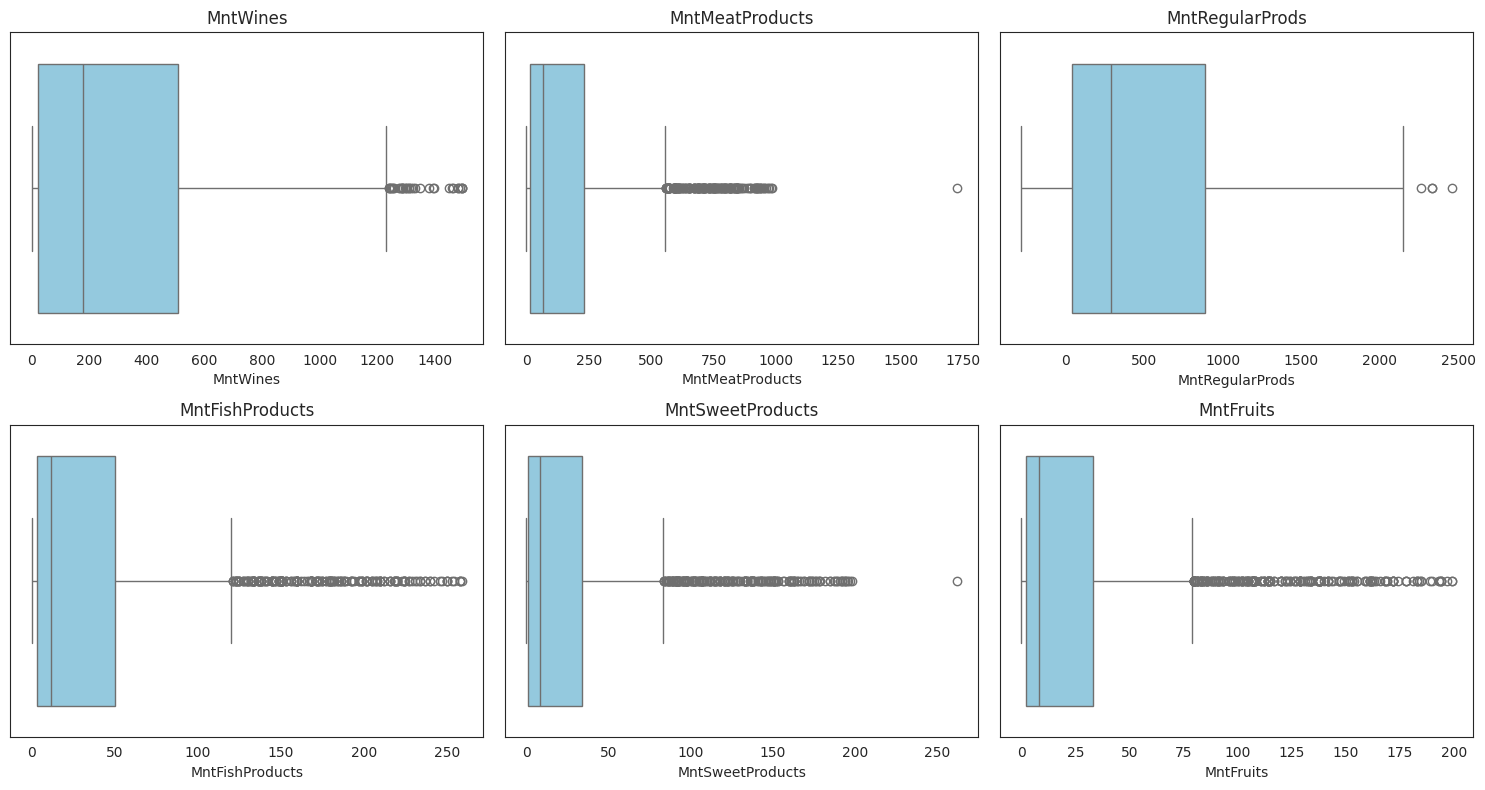

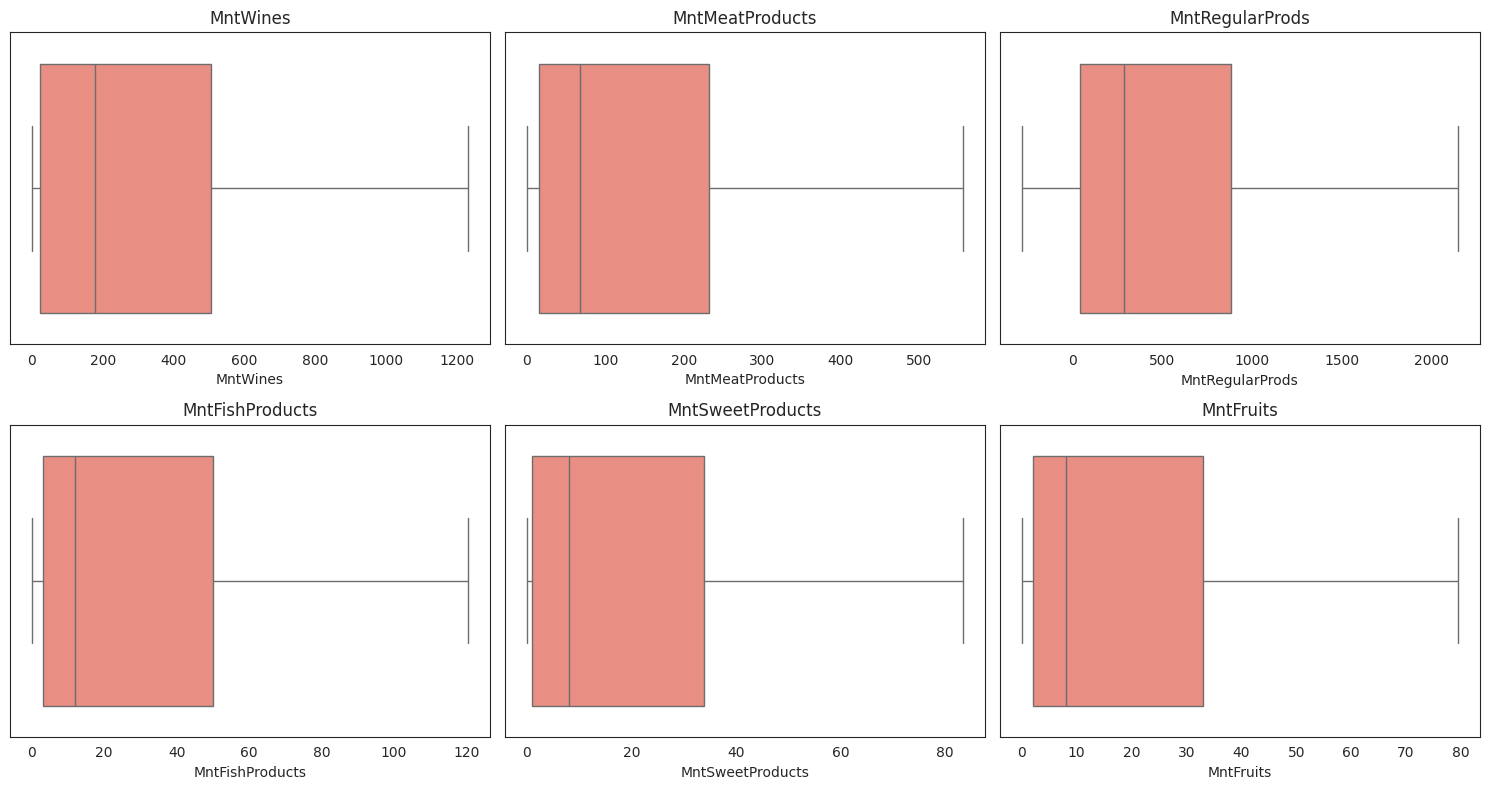

In [ ]:
# Lưu bản gốc để so sánh boxplot
df_original = df.copy()

# === 1) Winsorize cho các biến chi tiêu ===
spending_outlier_cols = [
    'MntWines','MntMeatProducts','MntRegularProds',
    'MntFishProducts','MntSweetProducts','MntFruits'
]

def winsorize_iqr(s: pd.Series, factor=1.5):
    s = pd.to_numeric(s, errors='coerce')
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lo, up = q1 - factor*iqr, q3 + factor*iqr
    return s.clip(lo, up), float(lo), float(up)

cap_info = {}
for col in spending_outlier_cols:
    if col in df.columns:
        capped, lo, up = winsorize_iqr(df[col])
        df[col + '_was_capped'] = ((df[col] < lo) | (df[col] > up)).astype(int)
        df[col] = capped
        cap_info[col] = {
            'lower': lo, 'upper': up,
            'n_capped': int(df[col + '_was_capped'].sum()),
            'pct_capped': round(df[col + '_was_capped'].mean()*100, 2)
        }

# ===  Bảng tóm tắt kết quả xử lý ===
cap_report = pd.DataFrame(cap_info).T
print("Báo cáo winsorization (các biến chi tiêu):\n", cap_report)

# === Vẽ boxplot Before/After cho tất cả biến cùng lúc ===
def plot_boxplots_grid(cols, data, title_prefix):
    # 2 hàng x 3 cột, mỗi ô rộng 4, cao 3
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        sns.boxplot(x=data[col], ax=axes[i],
                    color='skyblue' if title_prefix=="Trước" else 'salmon',
                    showfliers=True)
        axes[i].set_title(f"{col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("")  # bỏ nhãn Y cho gọn

    # Xóa subplot thừa nếu số biến < 6
    for j in range(len(cols), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Vẽ 6 biến trước xử lý
plot_boxplots_grid(spending_outlier_cols, df_original, "Trước")

# Vẽ 6 biến sau xử lý
plot_boxplots_grid(spending_outlier_cols, df, "Sau")

## Encoding categorical variables

In [ ]:
# Split X,y
TARGET = "Response"
has_target = TARGET in df.columns
y = df[TARGET].astype(int) if has_target else None
X = df.drop(columns=[TARGET], errors="ignore").copy()

# Define col groups
cat_cols = [c for c in ["marital_status","education","Living_With"] if c in X.columns]
bin_cols = [c for c in ["Is_Parent","Complain","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5"] if c in X.columns]
num_cols = [c for c in X.select_dtypes(include=[np.number]).columns if c not in bin_cols]

# Encoder (OHE cat; bin & num passthrough)
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

ct = ColumnTransformer([
    ("cat", ohe, cat_cols),
    ("bin", "passthrough", bin_cols),
    ("num", "passthrough", num_cols)
], remainder="drop", verbose_feature_names_out=False)

X_enc = ct.fit_transform(X[cat_cols + bin_cols + num_cols])

# Feature names
try:
    feature_names = ct.get_feature_names_out()
except:
    ohe_names = ct.named_transformers_["cat"].get_feature_names_out(cat_cols) if len(cat_cols)>0 else np.array([])
    feature_names = np.concatenate([ohe_names, np.array(bin_cols + num_cols)])

X_model = pd.DataFrame(X_enc, columns=feature_names, index=X.index)


## Scaling the features using the standard scaler

In [ ]:
# Scale numeric only
scaler = StandardScaler()
if len(num_cols)>0:
    X_model[num_cols] = scaler.fit_transform(X_model[num_cols])

print("Model-matrix shape (encoded+scaled):", X_model.shape)

Model-matrix shape (encoded+scaled): (2205, 48)


# Feature Selection

## Feature selection for clustering

In [ ]:
# =============================
# FEATURE SELECTION for CLUSTERING (unsupervised)
# - Business filter (drop target/leakage, flags, ID)
# - Zero-variance filter
# - Correlation filter (giữ whitelist)
# =============================

import re
import numpy as np
import pandas as pd

# 0) Config
TARGET = "Response"
CORR_THRESHOLD = 0.7              # gợi ý 0.8–0.85 nếu muốn giữ nhiều biến hơn
KEEP_MNTTOTAL = True              # False nếu bạn muốn loại MntTotal khi đã giữ đủ Mnt*

# 1) Start from numeric engineered (UNSCALED)
num_for_cluster = df.select_dtypes(include=[np.number]).columns.tolist()

# 2) Business filter
drop_business = []

# 2.1 Target / campaign outcomes (leakage)
drop_business += [c for c in [
    TARGET, "AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmpOverall"
] if c in num_for_cluster]

# 2.2 Technical flags (outlier flags, etc.)
drop_business += [c for c in num_for_cluster if re.search(r"_was_capped$", c)]

# 2.3 ID-like numeric
drop_business += [c for c in ["Index","ID","Id","Customer_ID","Customer","row_index"] if c in num_for_cluster]

# 2.4 (tuỳ chọn) loại MntTotal nếu đã có nhiều Mnt* chi tiết
if not KEEP_MNTTOTAL and "MntTotal" in num_for_cluster:
    drop_business.append("MntTotal")

# Apply business drop
drop_business = sorted(set(drop_business))
num_for_cluster = [c for c in num_for_cluster if c not in drop_business]
print(f"[FS-Cluster][Business] removed {len(drop_business)}: {drop_business if drop_business else '(none)'}")

# 3) Zero-variance filter
nz = df[num_for_cluster].nunique()
keep = nz[nz > 1].index.tolist()
if len(keep) == 0:
    cluster_features = []
else:
    # 4) Correlation filter (Spearman) + whitelist
    #    → luôn giữ vài biến “xương sống” nếu có
    whitelist = [c for c in [
        "Recency","Income","Age","Children",
        "Ratio_NumWebPurchases","Ratio_NumStorePurchases","Ratio_NumCatalogPurchases",
        "NumWebVisitsMonth","NumDealsPurchases"
    ] if c in keep]

    corr = df[keep].corr(method="spearman").abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

    to_drop = []
    for col in upper.columns:
        if col in whitelist:
            continue
        if any(upper[col] >= CORR_THRESHOLD):
            to_drop.append(col)

    cluster_features = [c for c in keep if c not in to_drop]

print(f"[FS-Cluster] kept {len(cluster_features)} features (removed {len(keep) - len(cluster_features)} incl. corr≥{CORR_THRESHOLD}).")
print("Examples:", cluster_features[:25])


[FS-Cluster][Business] removed 13: ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmpOverall', 'MntFishProducts_was_capped', 'MntFruits_was_capped', 'MntMeatProducts_was_capped', 'MntRegularProds_was_capped', 'MntSweetProducts_was_capped', 'MntWines_was_capped', 'Response']
[FS-Cluster] kept 14 features (removed 11 incl. corr≥0.7).
Examples: ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntFruits', 'MntGoldProds', 'NumDealsPurchases', 'NumWebVisitsMonth', 'Age', 'Customer_Days', 'Children', 'Ratio_NumWebPurchases', 'Ratio_NumCatalogPurchases', 'Ratio_NumStorePurchases']


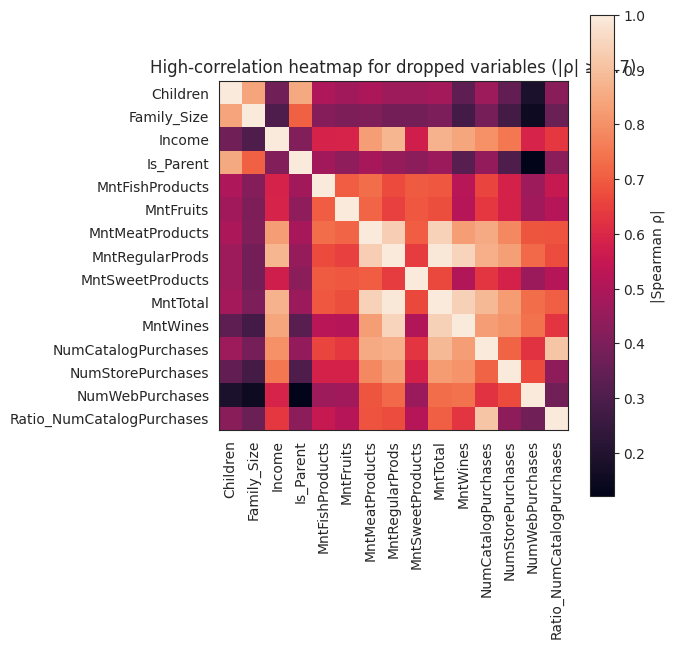

Top high-correlation pairs involving dropped vars:
             feat_i                    feat_j  abs_spearman
    MntRegularProds                  MntTotal      0.991683
           MntWines           MntRegularProds      0.945521
    MntMeatProducts                  MntTotal      0.941942
           MntWines                  MntTotal      0.940908
    MntMeatProducts           MntRegularProds      0.933916
NumCatalogPurchases Ratio_NumCatalogPurchases      0.914082
           MntTotal       NumCatalogPurchases      0.886116
             Income           MntRegularProds      0.877901
             Income                  MntTotal      0.869619
    MntRegularProds       NumCatalogPurchases      0.866075
    MntMeatProducts       NumCatalogPurchases      0.852785
           Children                 Is_Parent      0.851926
             Income                  MntWines      0.843931
           Children               Family_Size      0.840159
    MntRegularProds         NumStorePurchases    

In [ ]:
# =============================
# JUSTIFICATION PLOT for correlation-based drops (Spearman |ρ|)
# - Vẽ heatmap cho các biến bị loại do tương quan cao (và các biến liên quan)
# - Không thay đổi cluster_features hay bất kỳ biến nào trước đó
# =============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 0) Kiểm tra tối thiểu các biến đã có từ cell trước
assert 'df' in globals(), "df chưa tồn tại. Hãy chạy cell chọn biến trước."
assert 'CORR_THRESHOLD' in globals(), "CORR_THRESHOLD chưa tồn tại. Hãy chạy cell chọn biến trước."
assert 'keep' in globals() and isinstance(keep, list), "keep chưa tồn tại. Hãy chạy cell chọn biến trước."

# to_drop chỉ có khi có ít nhất 1 biến bị loại bởi tương quan
if 'to_drop' not in globals():
    # Nếu cell trước không để 'to_drop' ở scope toàn cục, ta khôi phục tạm:
    corr_full = df[keep].corr(method="spearman").abs()
    upper_full = corr_full.where(np.triu(np.ones(corr_full.shape), k=1).astype(bool))
    to_drop = [col for col in upper_full.columns if any(upper_full[col] >= CORR_THRESHOLD)]

# 1) Tính lại ma trận tương quan |ρ| cho tập 'keep' (sau zero-variance, trước khi loại theo corr)
corr = df[keep].corr(method="spearman").abs()

# 2) Lọc các cặp có |ρ| ≥ ngưỡng và có ít nhất 1 biến bị loại (to_drop)
pairs = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))  # tam giác trên
        .stack()
        .reset_index()
        .rename(columns={'level_0': 'feat_i', 'level_1': 'feat_j', 0: 'abs_spearman'})
)
high_corr_pairs = pairs[
    (pairs['abs_spearman'] >= CORR_THRESHOLD) &
    (pairs['feat_i'].isin(to_drop) | pairs['feat_j'].isin(to_drop))
].sort_values('abs_spearman', ascending=False)

# 3) Xác định tập biến “có tham gia” vào các cặp tương quan cao ở trên
involved = set()
for _, row in high_corr_pairs.iterrows():
    involved.add(row['feat_i'])
    involved.add(row['feat_j'])
involved = sorted(involved)

# Nếu danh sách quá dài, giới hạn để biểu đồ gọn
MAX_VARS = 30
if len(involved) > MAX_VARS:
    # Lấy theo các cặp cao nhất trước
    top_involved = set()
    for _, row in high_corr_pairs.head(80).iterrows():
        top_involved.add(row['feat_i'])
        top_involved.add(row['feat_j'])
        if len(top_involved) >= MAX_VARS:
            break
    involved = sorted(top_involved)

# 4) Vẽ heatmap cho các biến "bị loại" và các biến liên quan
if len(involved) >= 2:
    subcorr = df[involved].corr(method="spearman").abs().values

    # Lưu ý: chỉ dùng matplotlib, 1 hình, không set màu cụ thể
    fig = plt.figure(figsize=(max(6, len(involved)*0.45), max(5, len(involved)*0.45)))
    plt.imshow(subcorr, interpolation="nearest")
    plt.colorbar(label="|Spearman ρ|")
    plt.xticks(range(len(involved)), involved, rotation=90)
    plt.yticks(range(len(involved)), involved)
    plt.title(f"High-correlation heatmap for dropped variables (|ρ| ≥ {CORR_THRESHOLD})")
    plt.tight_layout()
    plt.show()

    # (Tuỳ chọn) In Top cặp để bỏ vào Phụ lục/giải thích
    print("Top high-correlation pairs involving dropped vars:")
    print(high_corr_pairs.head(20).to_string(index=False))
else:
    print("Không đủ biến để vẽ heatmap (ít hơn 2 biến liên quan). Có thể số biến bị loại do tương quan quá ít.")

## Feature selection for prediction

In [ ]:
from sklearn.feature_selection import mutual_info_classif

TOPK_MI = 15

if has_target and y.nunique() > 1:
    X_pred_num = X_model.replace([np.inf,-np.inf], np.nan).fillna(0)

    # (Optional) Spearman pre-filter
    corr = X_pred_num.corrwith(y, method="spearman").abs().sort_values(ascending=False)
    pre_keep = corr[corr >= 0.02].index.tolist()  # giữ biến có |rho|>=0.02
    if len(pre_keep) == 0:
        pre_keep = corr.head(30).index.tolist()   # fallback: giữ top-30 theo corr
    X_pred_num = X_pred_num[pre_keep]

    # Mutual Information
    mi = mutual_info_classif(X_pred_num, y, random_state=42, discrete_features=False)
    mi_series = pd.Series(mi, index=X_pred_num.columns).sort_values(ascending=False)

    # Top-K theo MI
    pred_features = mi_series.head(TOPK_MI).index.tolist()

    # Thêm bắt buộc (business-driven)
    # must_keep = [c for c in ["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmpOverall",
    #                          "Income","Age","Children","Ratio_NumWebPurchases","Ratio_NumCatalogPurchases","Ratio_NumStorePurchases"]
    #              if c in X_model.columns]
    # pred_features = list(dict.fromkeys(pred_features + must_keep))  # merge + remove duplicates

    print(f"[FS-Predict] selected {len(pred_features)} features (top-{TOPK_MI} by MI).")
    print(pred_features)
    display(mi_series.head(TOPK_MI))

else:
    pred_features = X_model.columns.tolist()
    print("[FS-Predict] No/invalid target → keep all encoded features.")


[FS-Predict] selected 15 features (top-15 by MI).
['AcceptedCmpOverall', 'Ratio_NumStorePurchases', 'MntTotal', 'MntMeatProducts', 'MntRegularProds', 'Income', 'AcceptedCmp5', 'MntGoldProds', 'MntWines', 'Family_Size', 'AcceptedCmp1', 'Ratio_NumCatalogPurchases', 'Is_Parent', 'NumCatalogPurchases', 'Recency']


,0
AcceptedCmpOverall,0.081659
Ratio_NumStorePurchases,0.058504
MntTotal,0.052835
MntMeatProducts,0.044454
MntRegularProds,0.042897
Income,0.036825
AcceptedCmp5,0.034061
MntGoldProds,0.032957
MntWines,0.032741
Family_Size,0.029651


# Clustering Models

## Clustering

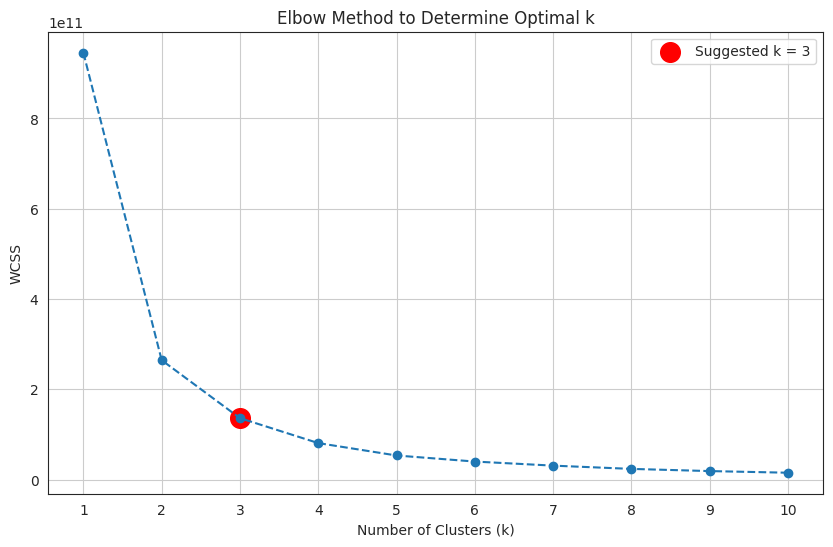

WCSS values for k=1 to 10:
k=1: 945684455826.39
k=2: 264574467955.54
k=3: 136132825006.18
k=4: 80864603447.94
k=5: 53379185143.21
k=6: 39943221291.14
k=7: 30915737118.31
k=8: 23691420197.11
k=9: 18850998960.87
k=10: 15204352383.84

Số cụm gợi ý theo Elbow method: 3


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Lấy dữ liệu đã được chọn cho clustering (đã được xử lý outliers)
# Sử dụng danh sách cluster_features đã lưu từ bước trước
# Đảm bảo chỉ lấy các cột có trong df sau khi winsorize
cluster_cols = [col for col in cluster_features if col in df.columns]
X_cluster = df[cluster_cols]

# Tính WCSS cho các giá trị k
wcss = []
# Thử các giá trị k từ 1 đến 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10) # n_init to suppress warning
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)

# Heuristic tìm “khuỷu tay” bằng khoảng cách tới đường nối 2 đầu
x = np.array(list(range(1, 11)), dtype=float)
y = np.array(wcss, dtype=float)
p1, p2 = np.array([x[0], y[0]]), np.array([x[-1], y[-1]])
line_vec = p2 - p1
line_vec_norm = line_vec / np.linalg.norm(line_vec)
distances = []
for xi, yi in zip(x, y):
    p = np.array([xi, yi])
    vec = p - p1
    proj_len = np.dot(vec, line_vec_norm)
    proj = p1 + proj_len * line_vec_norm
    distances.append(np.linalg.norm(p - proj))
elbow_k = int(x[int(np.argmax(distances))])


# Vẽ biểu đồ Elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)

# Highlight the elbow point
plt.scatter([elbow_k], [wcss[elbow_k-1]], s=200, color='red', label=f'Suggested k = {elbow_k}')
plt.legend()

plt.show()

print("WCSS values for k=1 to 10:")
for i, value in enumerate(wcss):
    print(f"k={i+1}: {value:.2f}")

print(f"\nSố cụm gợi ý theo Elbow method: {elbow_k}")

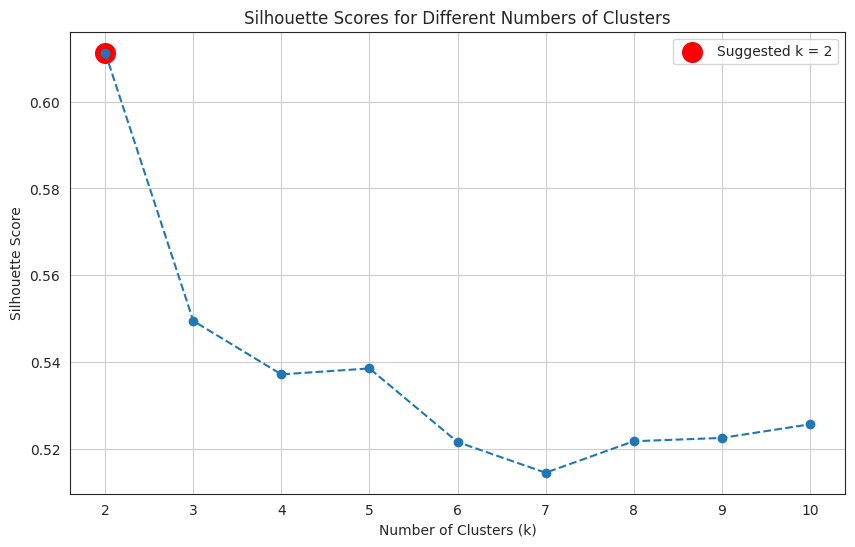

Silhouette scores for k=2 to 10:
k=2: 0.6113
k=3: 0.5495
k=4: 0.5372
k=5: 0.5386
k=6: 0.5216
k=7: 0.5145
k=8: 0.5218
k=9: 0.5225
k=10: 0.5257

Số cụm gợi ý theo Silhouette score: 2


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np # Import numpy

# Lấy dữ liệu đã được chọn cho clustering
# Sử dụng danh sách cluster_features đã lưu từ bước trước
# Đảm bảo chỉ lấy các cột có trong df sau khi winsorize
cluster_cols = [col for col in cluster_features if col in df.columns]
X_cluster = df[cluster_cols]

# Tính Silhouette scores cho các giá trị k
silhouette_scores = []
# Bắt đầu từ k=2 vì Silhouette score không định nghĩa cho k=1
k_values = range(2, 11) # Define k_values
for i in k_values:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    score = silhouette_score(X_cluster, kmeans.labels_)
    silhouette_scores.append(score)

# Find the k with the highest silhouette score
best_k_silhouette = list(k_values)[np.argmax(silhouette_scores)]

# Vẽ biểu đồ Silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

# Highlight the best k
plt.scatter([best_k_silhouette], [silhouette_scores[list(k_values).index(best_k_silhouette)]],
            s=200, color='red', label=f'Suggested k = {best_k_silhouette}')
plt.legend()

plt.show()

print("Silhouette scores for k=2 to 10:")
for i, score in enumerate(silhouette_scores):
    print(f"k={list(k_values)[i]}: {score:.4f}")

print(f"\nSố cụm gợi ý theo Silhouette score: {best_k_silhouette}") # Added print statement

In [ ]:
from sklearn.cluster import KMeans

# Choose the number of clusters (based on Elbow and Silhouette)
chosen_k = 3

# Initialize KMeans
kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init=10)

print(f"Initialized KMeans with {chosen_k} clusters.")

Initialized KMeans with 3 clusters.


In [ ]:
# Fit the model to the clustering data
kmeans.fit(X_cluster)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

print("KMeans model fitted and cluster labels added to DataFrame.")
display(df.head())

KMeans model fitted and cluster labels added to DataFrame.


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntRegularProds,...,Ratio_NumWebPurchases,Ratio_NumCatalogPurchases,Ratio_NumStorePurchases,MntWines_was_capped,MntMeatProducts_was_capped,MntRegularProds_was_capped,MntFishProducts_was_capped,MntSweetProducts_was_capped,MntFruits_was_capped,Cluster
0,58138,0,0,58,635.0,79.5,546,120.5,83.5,1441,...,0.363636,0.454545,0.181818,0,0,0,1,1,1,0
1,46344,1,1,38,11.0,1.0,6,2.0,1.0,15,...,0.250000,0.250000,0.500000,0,0,0,0,0,0,0
2,71613,0,0,26,426.0,49.0,127,111.0,21.0,692,...,0.400000,0.100000,0.500000,0,0,0,0,0,0,1
3,26646,1,0,26,11.0,4.0,20,10.0,3.0,43,...,0.333333,0.000000,0.666667,0,0,0,0,0,0,2
4,58293,1,0,94,173.0,43.0,118,46.0,27.0,392,...,0.357143,0.214286,0.428571,0,0,0,0,0,0,0


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calculate evaluation metrics
silhouette_avg = silhouette_score(X_cluster, cluster_labels)
calinski_harabasz_avg = calinski_harabasz_score(X_cluster, cluster_labels)
davies_bouldin_avg = davies_bouldin_score(X_cluster, cluster_labels)

print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.4f}")

Silhouette Score: 0.5495
Calinski-Harabasz Index: 6547.4230
Davies-Bouldin Index: 0.5450


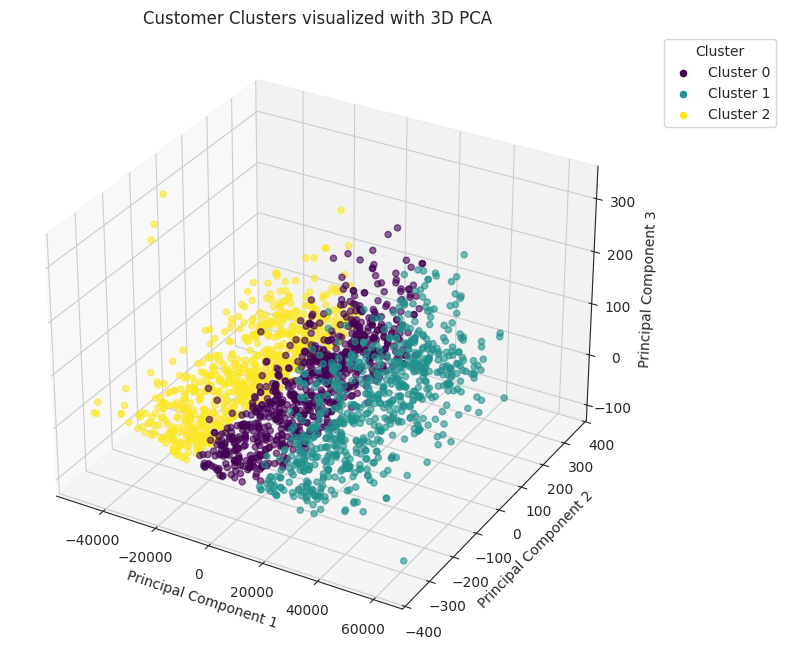

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Use PCA to reduce dimensions to 3 for 3D visualization
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_cluster) # Use X_cluster for PCA

# Create a DataFrame for the PCA results and cluster labels
pca_df_3d = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df_3d['Cluster'] = cluster_labels

# Visualize the clusters in 3D PCA space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each cluster (you can customize this palette)
colors = plt.cm.viridis(np.linspace(0, 1, len(pca_df_3d['Cluster'].unique())))
cluster_colors = [colors[c] for c in pca_df_3d['Cluster']]

ax.scatter(pca_df_3d['PCA1'], pca_df_3d['PCA2'], pca_df_3d['PCA3'], c=cluster_colors, marker='o', alpha=0.6)

ax.set_title('Customer Clusters visualized with 3D PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Create a legend
for i, color in enumerate(colors):
    ax.scatter([], [], [], c=[color], marker='o', label=f'Cluster {i}')
# Adjust legend position
ax.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()

In [ ]:
# 1. Quy mô cụm
# Số lượng khách hàng trong cụm & Tỷ lệ % so với toàn bộ dataset.
print("=== Kích thước cụm ===")
cluster_sizes = df['Cluster'].value_counts().sort_index()
display(cluster_sizes)

=== Kích thước cụm ===


,count
Cluster,
0,771
1,716
2,718


In [ ]:
from scipy.stats import zscore

# Define continuous columns (excluding the cluster column)
continuous_cols = df.select_dtypes(include=np.number).columns.tolist()
continuous_cols.remove('Cluster')

# Calculate the mean of continuous variables per cluster
cont_means = df.groupby('Cluster')[continuous_cols].mean()

# Calculate the Z-scores per cluster
zscore = cont_means.apply(zscore, axis=0)

# Display the mean of continuous variables per cluster
print("\n=== Trung bình các biến liên tục theo cụm (scale) ===")
display(cont_means.round(3))

# Display the Z-scores per cluster
print("\n=== Z-score theo cụm (so với toàn tập) ===")
display(zscore.round(2))


=== Trung bình các biến liên tục theo cụm (scale) ===


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntRegularProds,...,Family_Size,Ratio_NumWebPurchases,Ratio_NumCatalogPurchases,Ratio_NumStorePurchases,MntWines_was_capped,MntMeatProducts_was_capped,MntRegularProds_was_capped,MntFishProducts_was_capped,MntSweetProducts_was_capped,MntFruits_was_capped
Cluster,,,,,,,,,,,,,,,,,,,,,
0,51464.780,0.419,0.811,49.656,269.923,15.367,91.025,21.890,15.271,375.947,...,2.872,0.358,0.145,0.497,0.001,0.006,0.000,0.035,0.042,0.052
1,75499.455,0.094,0.378,48.982,617.181,44.416,343.427,67.127,46.443,1133.432,...,2.112,0.286,0.274,0.440,0.046,0.229,0.006,0.263,0.282,0.281
2,27980.173,0.815,0.308,48.341,29.560,5.607,23.322,8.689,5.773,57.887,...,2.776,0.342,0.075,0.577,0.000,0.001,0.000,0.010,0.006,0.006



=== Z-score theo cụm (so với toàn tập) ===


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntRegularProds,...,Family_Size,Ratio_NumWebPurchases,Ratio_NumCatalogPurchases,Ratio_NumStorePurchases,MntWines_was_capped,MntMeatProducts_was_capped,MntRegularProds_was_capped,MntFishProducts_was_capped,MntSweetProducts_was_capped,MntFruits_was_capped
Cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.01,-0.08,1.40,1.24,-0.15,-0.39,-0.45,-0.43,-0.42,-0.32,...,0.84,0.94,-0.23,-0.14,-0.68,-0.68,-0.71,-0.59,-0.56,-0.51
1,1.23,-1.18,-0.54,-0.02,1.29,1.37,1.39,1.38,1.38,1.35,...,-1.40,-1.38,1.32,-1.15,1.41,1.41,1.41,1.41,1.40,1.40
2,-1.22,1.26,-0.86,-1.21,-1.14,-0.98,-0.94,-0.95,-0.96,-1.03,...,0.56,0.44,-1.09,1.29,-0.74,-0.73,-0.71,-0.82,-0.85,-0.89


## Description of Cluster Characteristics

In [ ]:
# Add the cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

print("Cluster labels added to DataFrame.")
display(df.head())

Cluster labels added to DataFrame.


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntRegularProds,...,Ratio_NumWebPurchases,Ratio_NumCatalogPurchases,Ratio_NumStorePurchases,MntWines_was_capped,MntMeatProducts_was_capped,MntRegularProds_was_capped,MntFishProducts_was_capped,MntSweetProducts_was_capped,MntFruits_was_capped,Cluster
0,58138,0,0,58,635.0,79.5,546,120.5,83.5,1441,...,0.363636,0.454545,0.181818,0,0,0,1,1,1,0
1,46344,1,1,38,11.0,1.0,6,2.0,1.0,15,...,0.250000,0.250000,0.500000,0,0,0,0,0,0,0
2,71613,0,0,26,426.0,49.0,127,111.0,21.0,692,...,0.400000,0.100000,0.500000,0,0,0,0,0,0,1
3,26646,1,0,26,11.0,4.0,20,10.0,3.0,43,...,0.333333,0.000000,0.666667,0,0,0,0,0,0,2
4,58293,1,0,94,173.0,43.0,118,46.0,27.0,392,...,0.357143,0.214286,0.428571,0,0,0,0,0,0,0


In [ ]:
# Save the DataFrame with cluster labels to a single Excel file
output_path_all = "iFood_clustered_data_all.xlsx"
df.to_excel(output_path_all, index=False)
print(f"DataFrame with all clusters saved to: {output_path_all}")

# Provide a download link for the single file
from google.colab import files
try:
    files.download(output_path_all)
    print("Download initiated for the combined file.")
except Exception as e:
    print(f"Error downloading {output_path_all}: {e}")

DataFrame with all clusters saved to: iFood_clustered_data_all.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download initiated for the combined file.


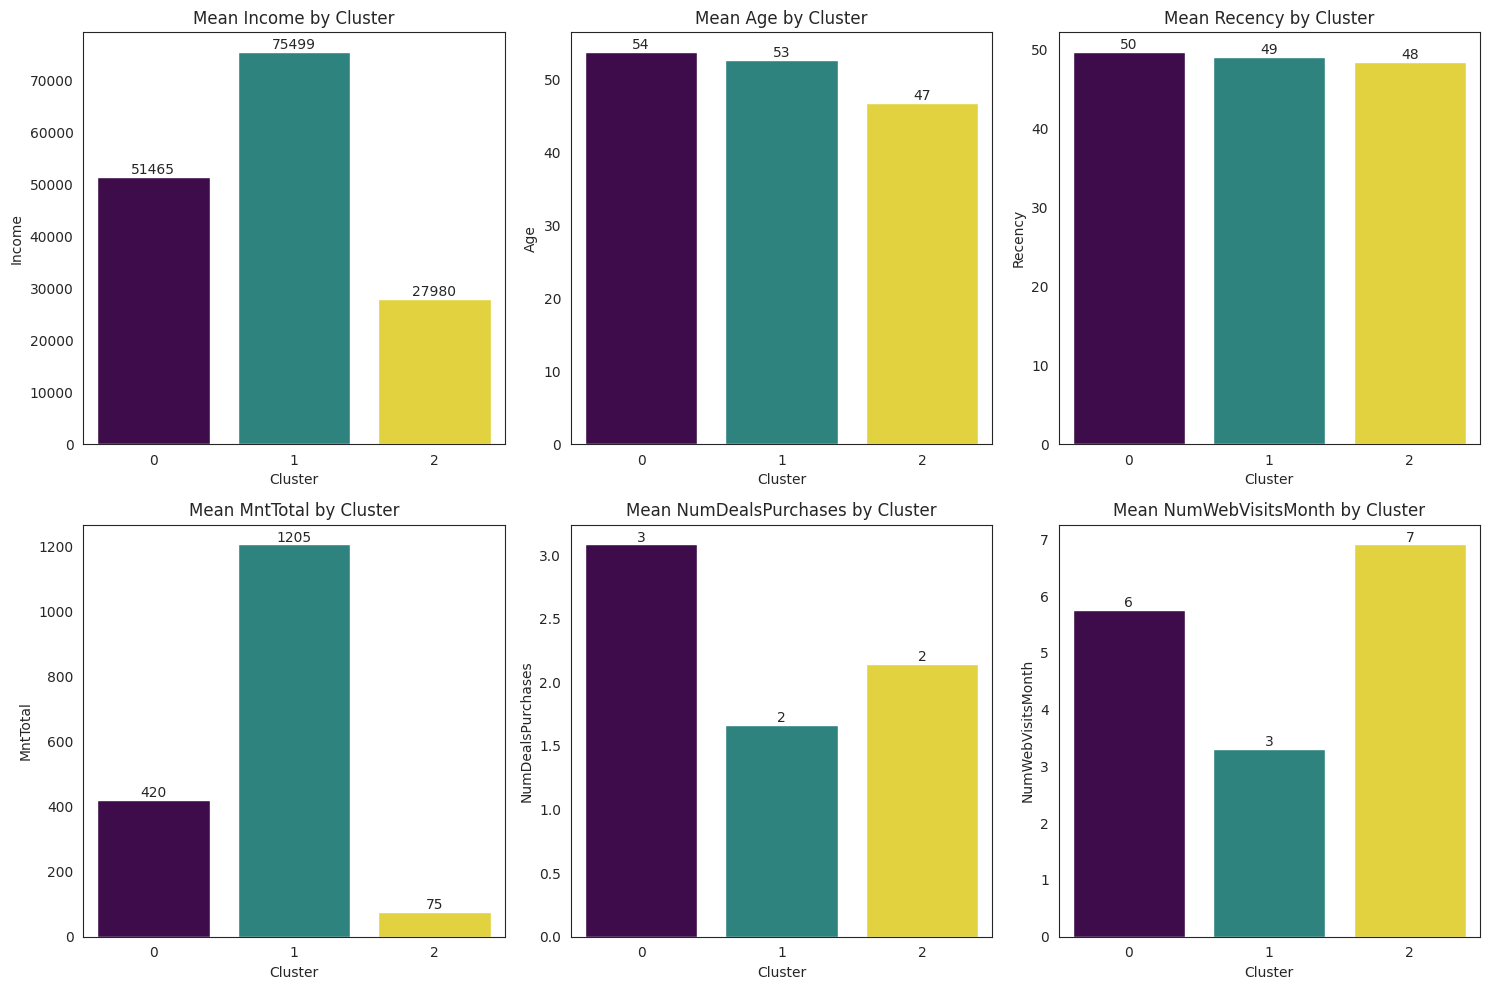

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Visualize continuous variables by cluster (using mean values)
cont_vars_to_plot = ['Income', 'Age', 'Recency', 'MntTotal', 'NumDealsPurchases', 'NumWebVisitsMonth']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cont_vars_to_plot):
    ax = plt.subplot(2, 3, i + 1)

    # Tạo dataframe tạm để seaborn dễ xử lý
    plot_df = pd.DataFrame({
        "Cluster": cont_means.index,
        col: cont_means[col].values
    })

    # Thêm hue=Cluster để không bị warning
    sns.barplot(
        data=plot_df,
        x="Cluster",
        y=col,
        hue="Cluster",
        palette="viridis",
        legend=False,
        ax=ax
    )

    ax.set_title(f'Mean {col} by Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(col)

    # Add values on top of bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

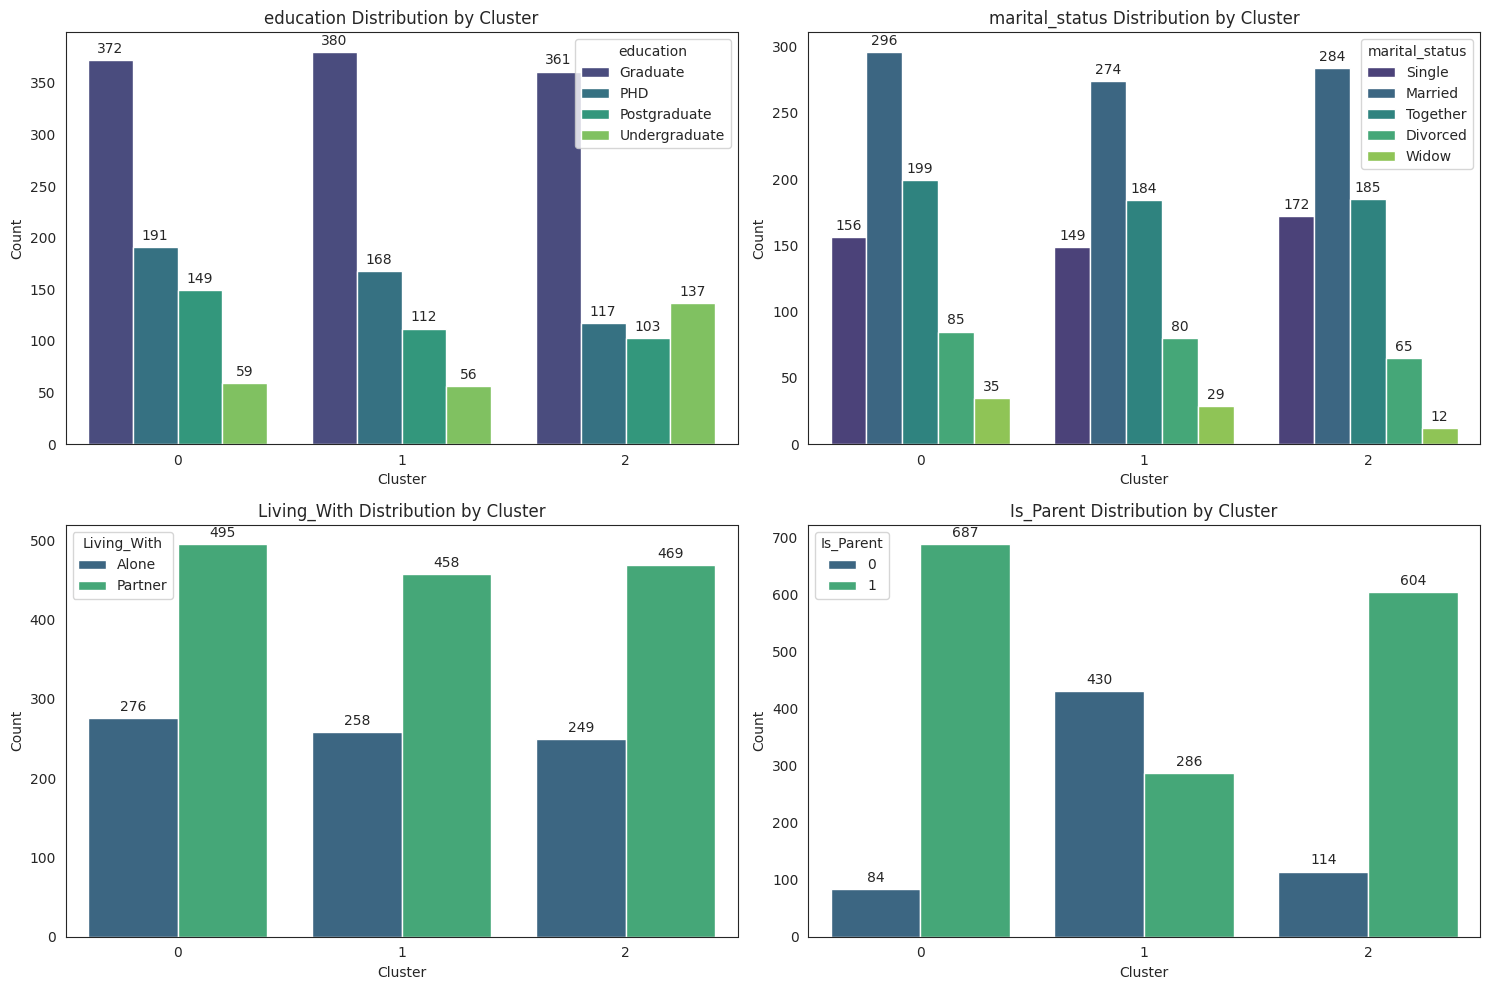

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize categorical variables by cluster (using count plots)
cat_vars_to_plot = ['education', 'marital_status', 'Living_With', 'Is_Parent']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_vars_to_plot):
    ax = plt.subplot(2, 2, i + 1)
    sns.countplot(x='Cluster', hue=col, data=df, palette='viridis', ax=ax)
    ax.set_title(f'{col} Distribution by Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Count')
    ax.legend(title=col)

    # Add counts on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', padding=3)


plt.tight_layout()
plt.show()

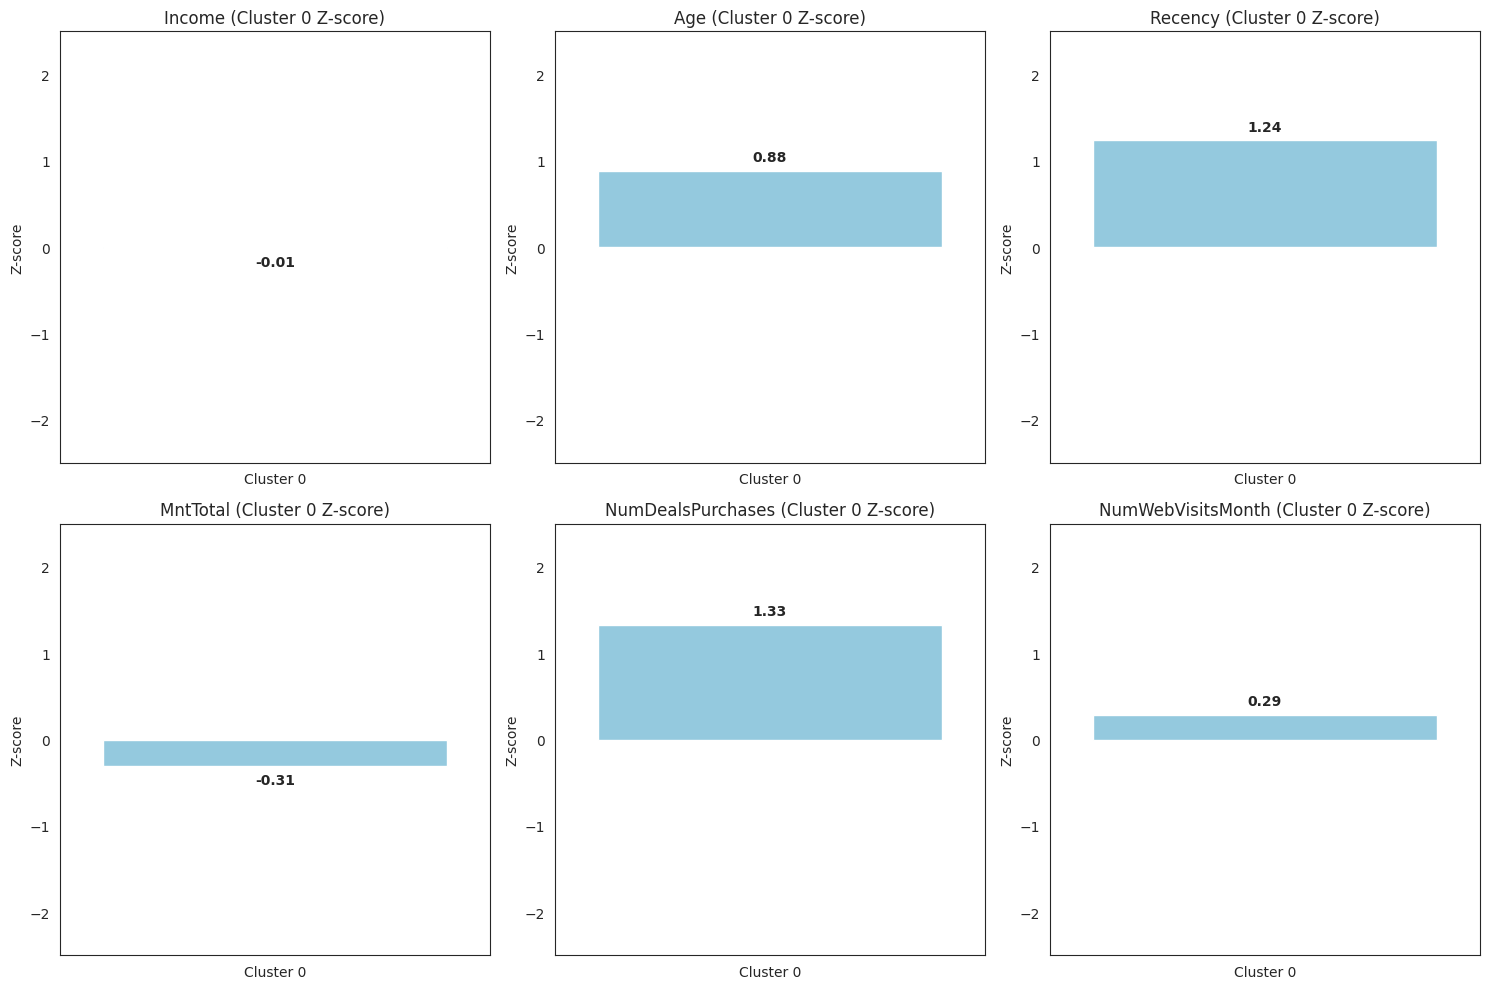

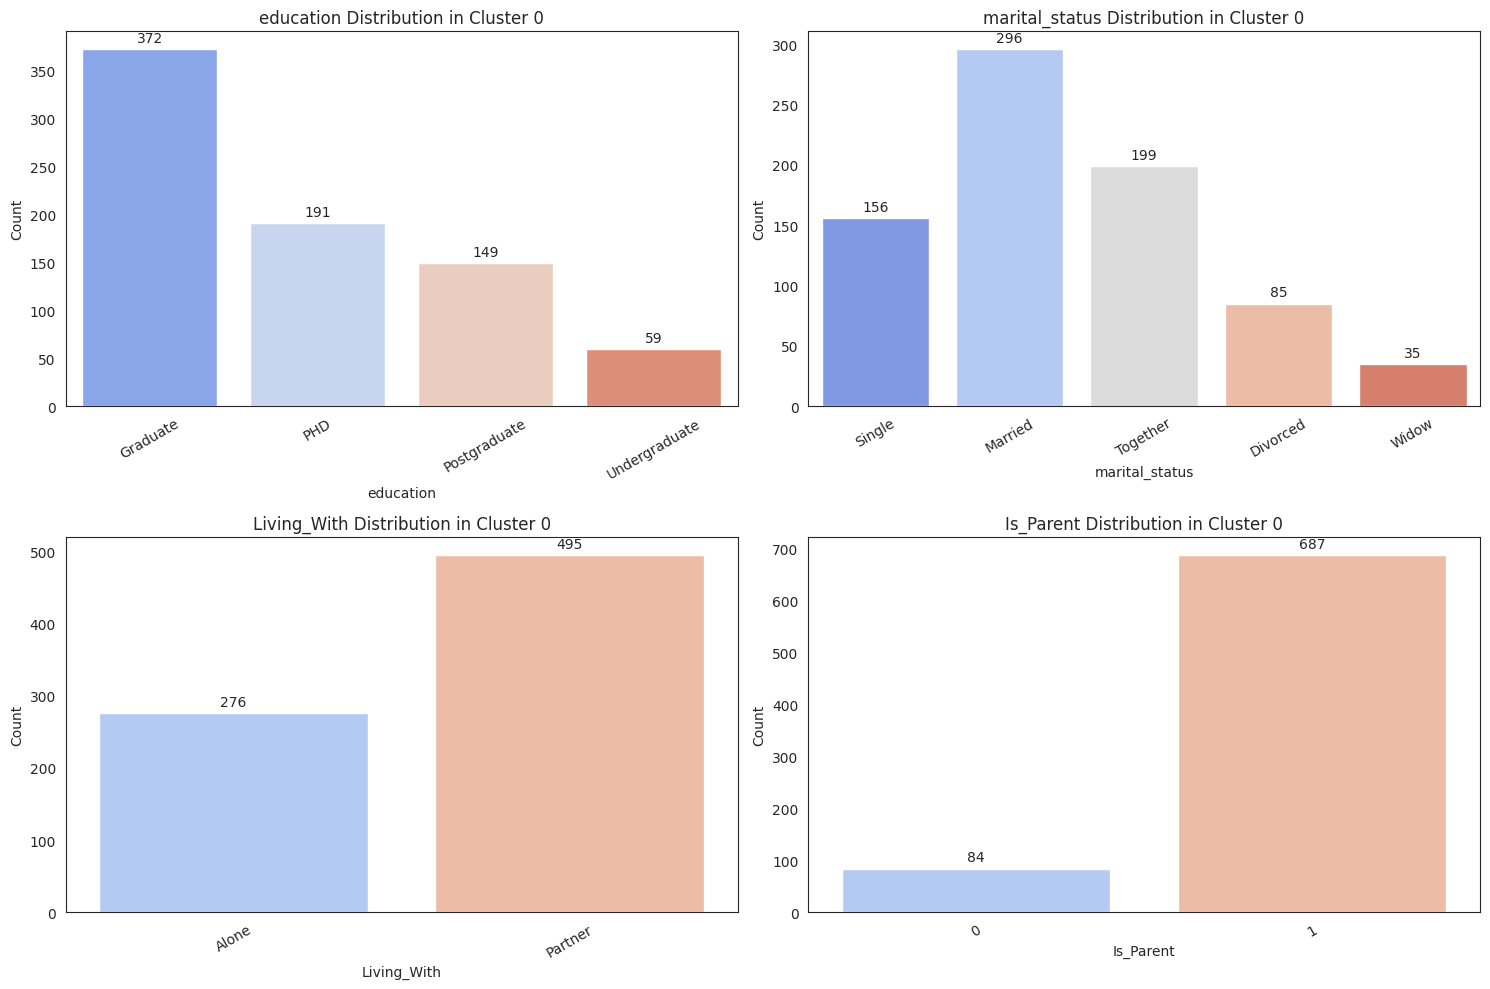

In [ ]:
# ---------------- Cluster 0 ----------------
df_cluster_0 = df[df['Cluster'] == 0]

# Continuous (Z-score)
plt.figure(figsize=(15, 10))
for i, col in enumerate(cont_vars_to_plot):
    ax = plt.subplot(2, 3, i + 1)
    z_val = zscore.loc[0, col]   # chỉ số cluster = 0

    sns.barplot(x=[f'Cluster 0'], y=[z_val], ax=ax, color='skyblue')

    ax.set_title(f'{col} (Cluster 0 Z-score)')
    ax.set_xlabel('')
    ax.set_ylabel('Z-score')
    ax.set_ylim([-2.5, 2.5])

    ax.annotate(f'{z_val:.2f}', (0, z_val),
                ha='center', va='bottom' if z_val >= 0 else 'top',
                xytext=(0, 5 * np.sign(z_val)), textcoords='offset points',
                fontweight='bold')

plt.tight_layout()
plt.show()

# Categorical
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_vars_to_plot):
    ax = plt.subplot(2, 2, i + 1)
    n_cat = df_cluster_0[col].nunique(dropna=False)
    pal = sns.color_palette('coolwarm', n_cat)

    sns.countplot(x=col, data=df_cluster_0, hue=col, palette=pal, legend=False, ax=ax)

    ax.set_title(f'{col} Distribution in Cluster 0')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

    for container in ax.containers:
        ax.bar_label(container, fmt='%d', padding=3)

    ax.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

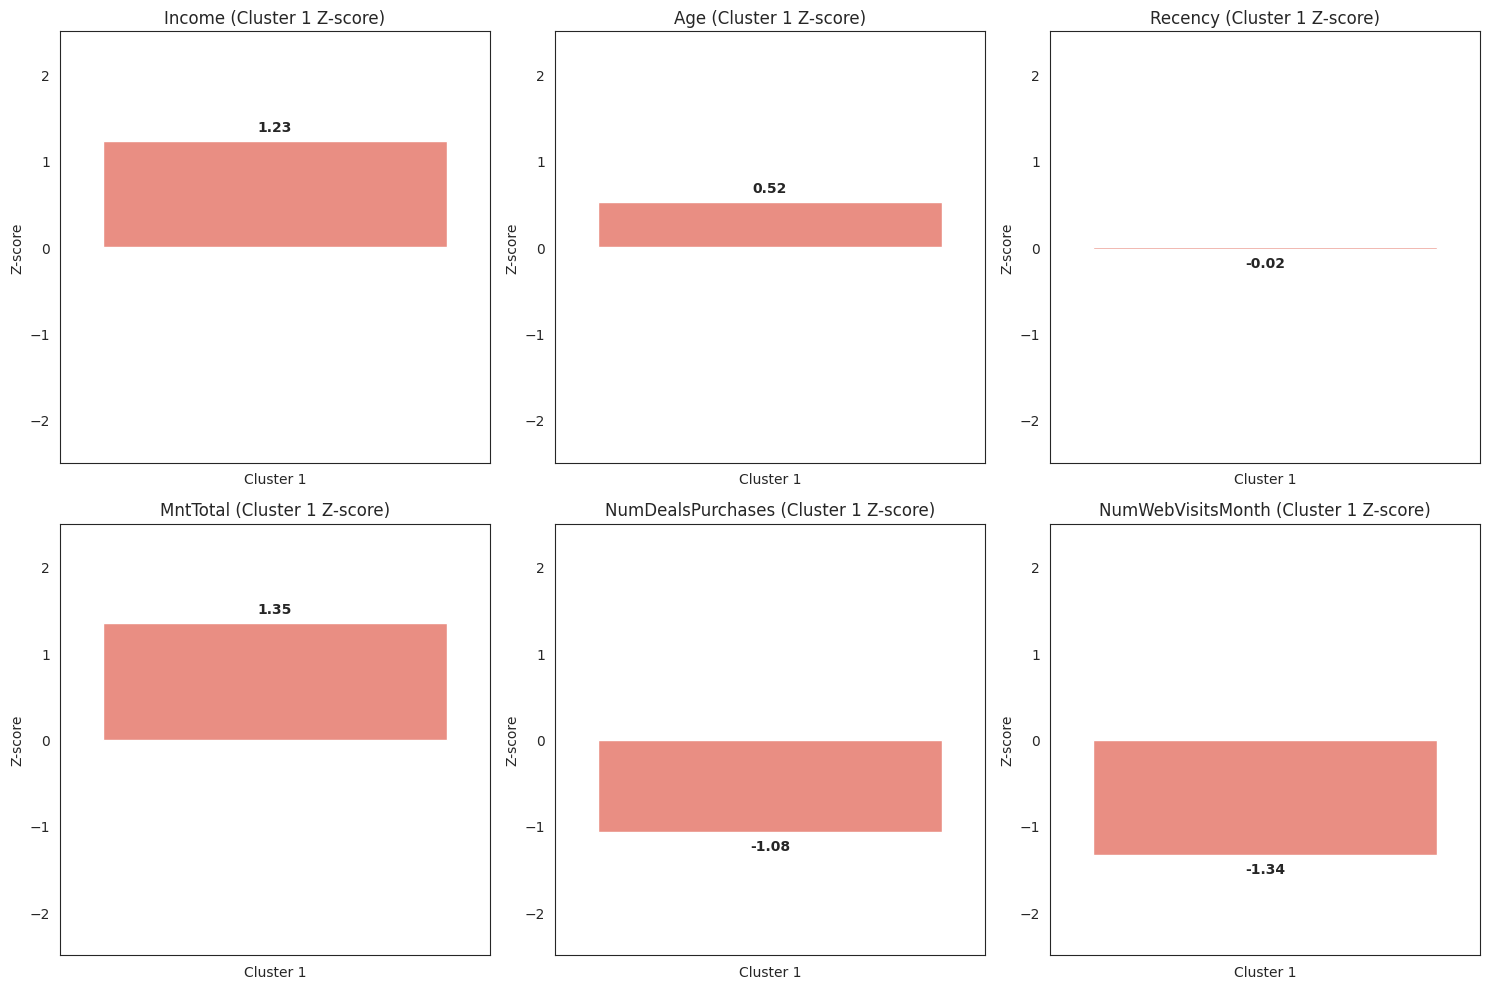

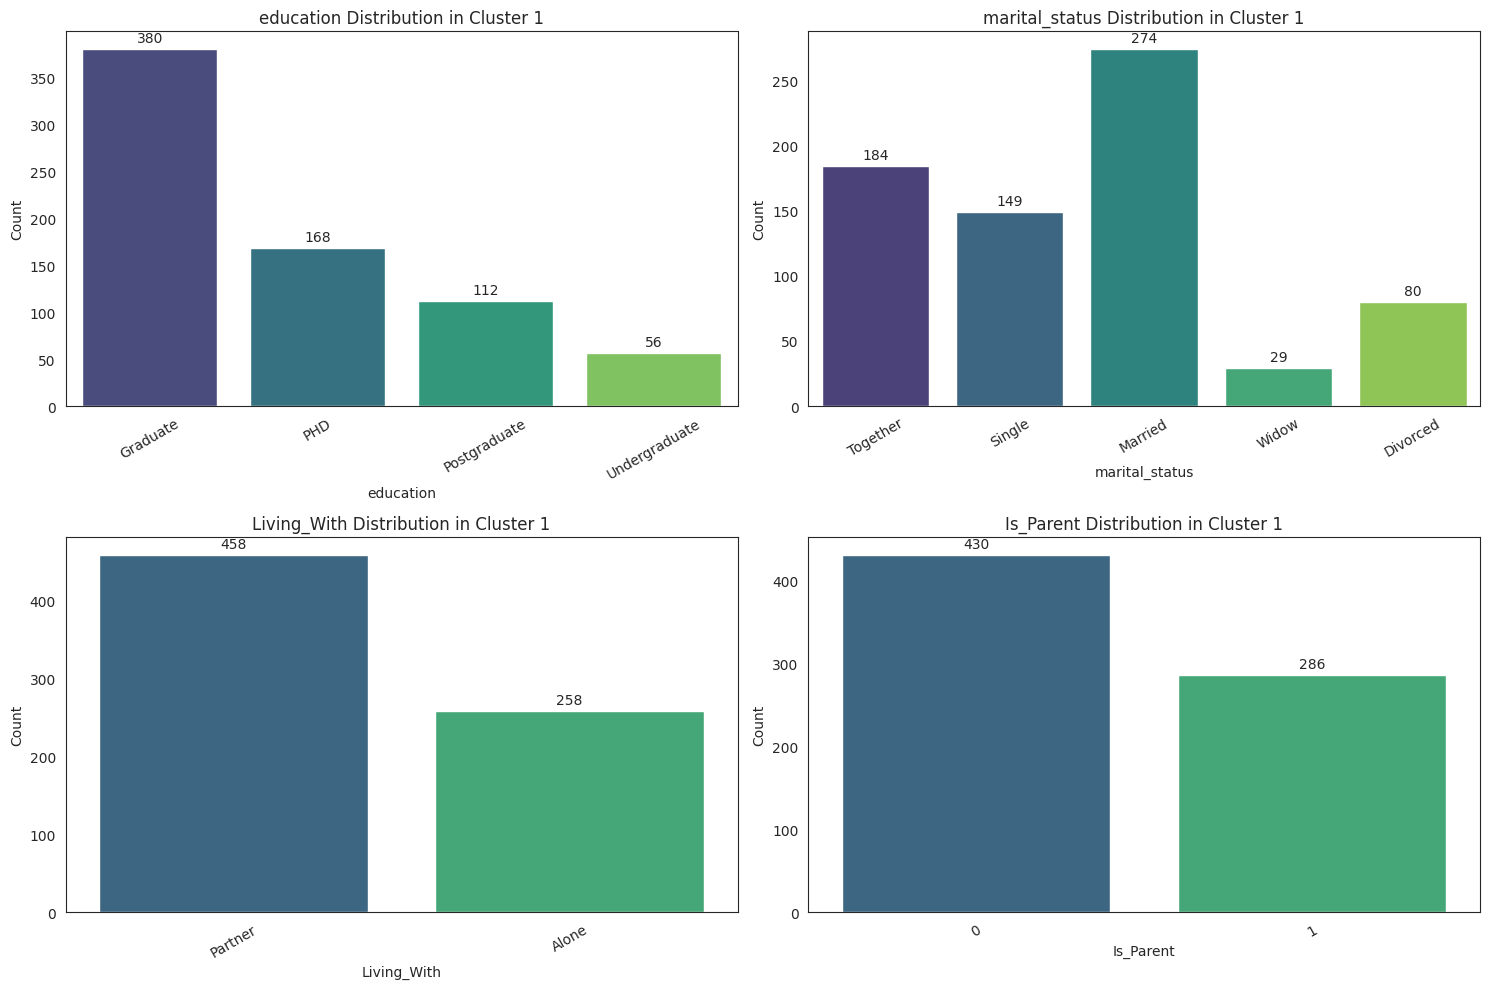

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cont_vars_to_plot = ['Income', 'Age', 'Recency', 'MntTotal', 'NumDealsPurchases', 'NumWebVisitsMonth']
cat_vars_to_plot = ['education', 'marital_status', 'Living_With', 'Is_Parent']

# ---------------- Cluster 1 ----------------
df_cluster_1 = df[df['Cluster'] == 1]

# Continuous (Z-score)
plt.figure(figsize=(15, 10))
for i, col in enumerate(cont_vars_to_plot):
    ax = plt.subplot(2, 3, i + 1)
    z_val = zscore.loc[1, col]   # chỉ số cluster = 1

    sns.barplot(x=[f'Cluster 1'], y=[z_val], ax=ax, color='salmon')

    ax.set_title(f'{col} (Cluster 1 Z-score)')
    ax.set_xlabel('')
    ax.set_ylabel('Z-score')
    ax.set_ylim([-2.5, 2.5])

    ax.annotate(f'{z_val:.2f}', (0, z_val),
                ha='center', va='bottom' if z_val >= 0 else 'top',
                xytext=(0, 5 * np.sign(z_val)), textcoords='offset points',
                fontweight='bold')

plt.tight_layout()
plt.show()

# Categorical
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_vars_to_plot):
    ax = plt.subplot(2, 2, i + 1)
    n_cat = df_cluster_1[col].nunique(dropna=False)
    pal = sns.color_palette('viridis', n_cat)

    sns.countplot(x=col, data=df_cluster_1, hue=col, palette=pal, legend=False, ax=ax)

    ax.set_title(f'{col} Distribution in Cluster 1')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

    for container in ax.containers:
        ax.bar_label(container, fmt='%d', padding=3)

    ax.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

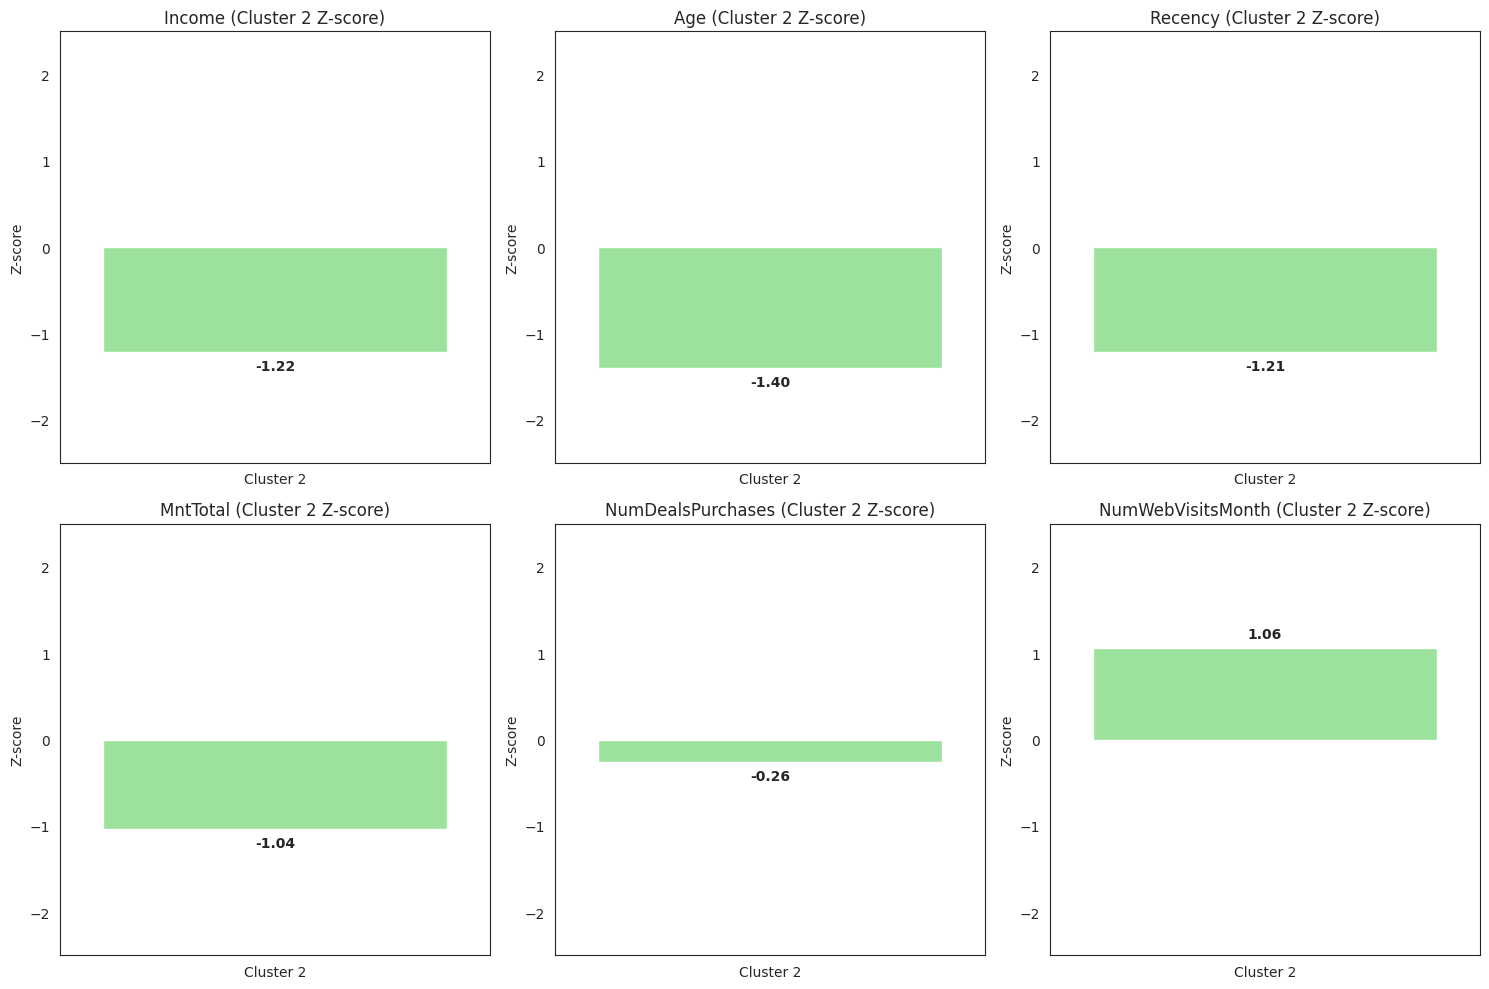

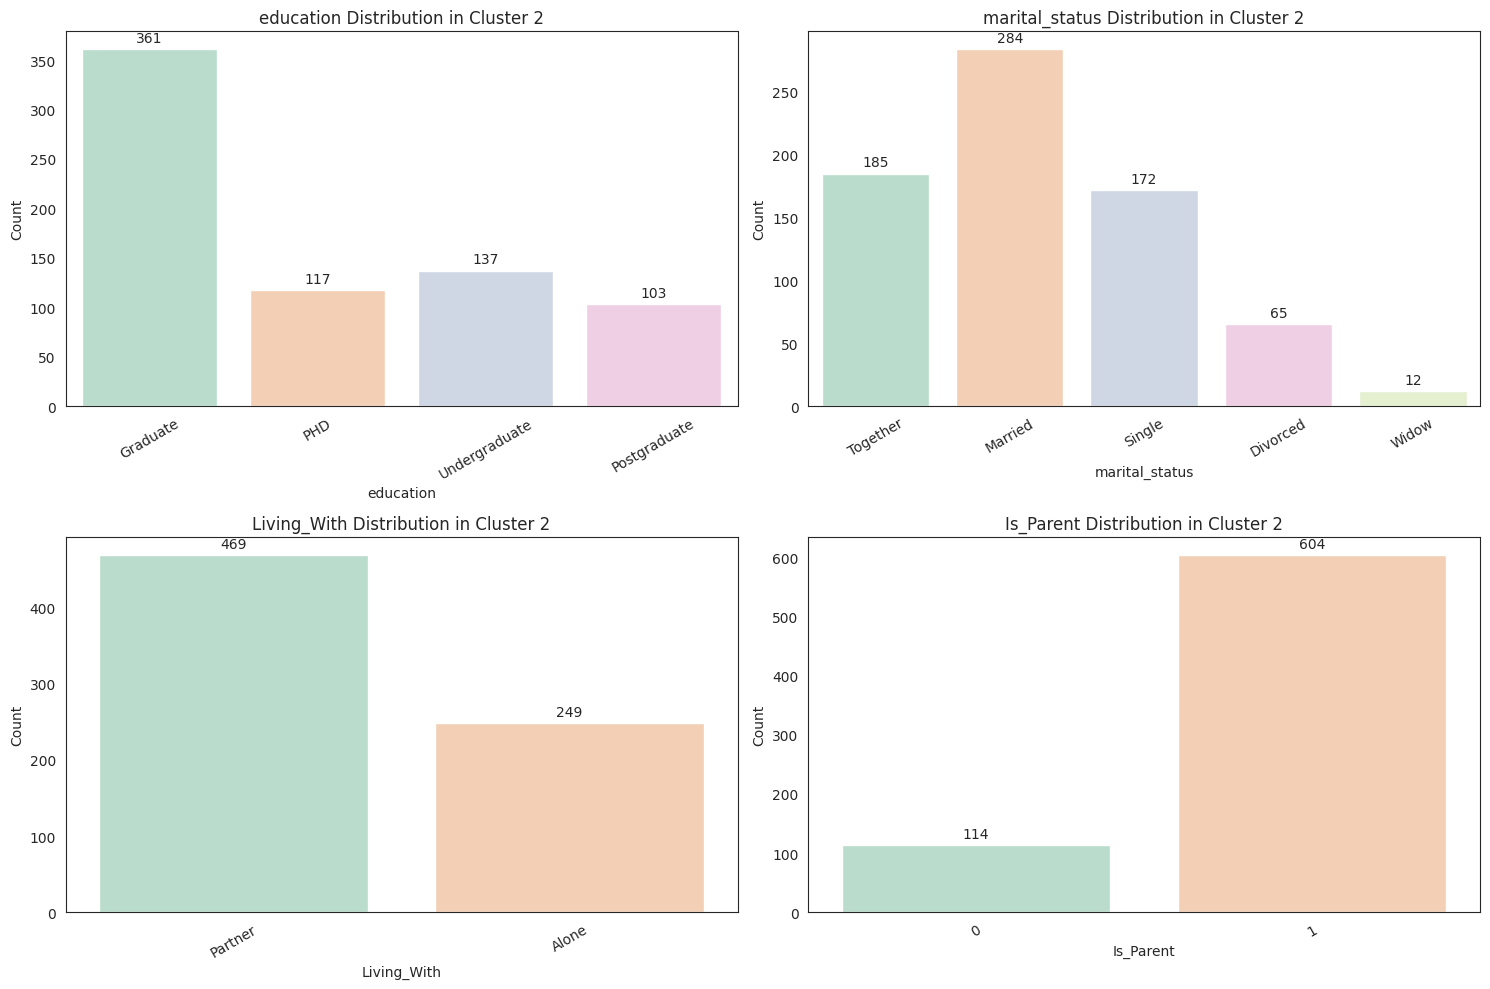

In [ ]:
# ---------------- Cluster 2 ----------------
df_cluster_2 = df[df['Cluster'] == 2]

# Continuous (Z-score)
plt.figure(figsize=(15, 10))
for i, col in enumerate(cont_vars_to_plot):
    ax = plt.subplot(2, 3, i + 1)
    z_val = zscore.loc[2, col]   # chỉ số cluster = 2

    sns.barplot(x=[f'Cluster 2'], y=[z_val], ax=ax, color='lightgreen')

    ax.set_title(f'{col} (Cluster 2 Z-score)')
    ax.set_xlabel('')
    ax.set_ylabel('Z-score')
    ax.set_ylim([-2.5, 2.5])

    ax.annotate(f'{z_val:.2f}', (0, z_val),
                ha='center', va='bottom' if z_val >= 0 else 'top',
                xytext=(0, 5 * np.sign(z_val)), textcoords='offset points',
                fontweight='bold')

plt.tight_layout()
plt.show()

# Categorical
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_vars_to_plot):
    ax = plt.subplot(2, 2, i + 1)
    n_cat = df_cluster_2[col].nunique(dropna=False)
    pal = sns.color_palette('Pastel2', n_cat)

    sns.countplot(x=col, data=df_cluster_2, hue=col, palette=pal, legend=False, ax=ax)

    ax.set_title(f'{col} Distribution in Cluster 2')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

    for container in ax.containers:
        ax.bar_label(container, fmt='%d', padding=3)

    ax.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

# Predictive Classification Models

In [ ]:
# Cài các thư viện cần thiết
!pip -q install scikit-learn imbalanced-learn xgboost openpyxl joblib

In [ ]:
# Imports & cấu hình
import os, json, warnings, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (roc_auc_score, average_precision_score, f1_score, precision_score,
                             recall_score, accuracy_score, confusion_matrix, RocCurveDisplay,
                             PrecisionRecallDisplay)
from sklearn.inspection import permutation_importance
import joblib

warnings.filterwarnings("ignore")
SEED = 42

## Cluster 0

In [ ]:
RESULT_DIR = "cluster0_results"
os.makedirs(RESULT_DIR, exist_ok=True)

In [ ]:
df = pd.read_excel("/content/iFood_cluster_0.xlsx")
print(df.shape)
df.head()

(771, 42)


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntRegularProds,...,Ratio_NumWebPurchases,Ratio_NumCatalogPurchases,Ratio_NumStorePurchases,MntWines_was_capped,MntMeatProducts_was_capped,MntRegularProds_was_capped,MntFishProducts_was_capped,MntSweetProducts_was_capped,MntFruits_was_capped,Cluster
0,58138,0,0,58,635.0,79.5,546,120.5,83.5,1441,...,0.363636,0.454545,0.181818,0,0,0,1,1,1,0
1,46344,1,1,38,11.0,1.0,6,2.0,1.0,15,...,0.250000,0.250000,0.500000,0,0,0,0,0,0,0
2,58293,1,0,94,173.0,43.0,118,46.0,27.0,392,...,0.357143,0.214286,0.428571,0,0,0,0,0,0,0
3,62513,0,1,16,520.0,42.0,98,0.0,42.0,688,...,0.300000,0.200000,0.500000,0,0,0,0,0,0,0
4,55635,0,1,34,235.0,65.0,164,50.0,49.0,536,...,0.411765,0.176471,0.411765,0,0,0,0,0,0,0


In [ ]:
FEATURES = [
    "AcceptedCmpOverall", "Ratio_NumStorePurchases", "MntTotal",
    "MntMeatProducts", "MntRegularProds", "Income", "AcceptedCmp5",
    "MntGoldProds", "MntWines", "Family_Size", "AcceptedCmp1",
    "Ratio_NumCatalogPurchases", "Is_Parent", "NumCatalogPurchases", "Recency"
]
TARGET = "Response"

X = df[FEATURES].copy()
y = df[TARGET].astype(int)

bin_cols = [c for c in ["AcceptedCmp1","AcceptedCmp5","AcceptedCmpOverall","Is_Parent"] if c in X.columns]
num_cols = [c for c in X.columns if c not in bin_cols]

### Train/Test Split

In [ ]:
# Train/Test split (70/30) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=SEED
)

### Data Balancing using SMOTE

In [ ]:
# Kiểm tra lệch lớp
pos_ratio = y_train.mean()                           # Tỷ lệ mẫu lớp 1 trong train
minority_ratio = pos_ratio if pos_ratio < 0.5 else 1 - pos_ratio
USE_SMOTE = minority_ratio < 0.40                    # Nếu lớp nhỏ <40% → bật SMOTE
print(f"Tỷ lệ lớp thiểu số: {minority_ratio:.3f} → SMOTE? {USE_SMOTE}")

# Tiền xử lý dữ liệu
# - num_cols: điền median + chuẩn hóa (StandardScaler)
# - bin_cols: giữ nguyên (0/1)
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), num_cols),
    ("bin", "passthrough", bin_cols)
], remainder="drop", verbose_feature_names_out=False)
# Tạo pipeline huấn luyện ---
# Gồm bước tiền xử lý + (thêm SMOTE nếu mất cân bằng)
base_steps = [("preprocess", preprocessor)]
if USE_SMOTE:
    base_steps.append(("smote", SMOTE(random_state=SEED)))

Tỷ lệ lớp thiểu số: 0.106 → SMOTE? True


### Model Training and Best Model Selection

In [ ]:
# Định nghĩa 3 mô hình ---
models = {
    "logreg": (ImbPipeline(base_steps + [
        ("clf", LogisticRegression(max_iter=2000, solver="lbfgs", random_state=SEED))
    ]), {"clf__C": [0.5, 1.0, 2.0]}),

    "rf": (ImbPipeline(base_steps + [
        ("clf", RandomForestClassifier(random_state=SEED, n_estimators=400, n_jobs=-1))
    ]), {"clf__max_depth": [None, 10, 20], "clf__min_samples_split": [2, 5]}),

    "xgb": (ImbPipeline(base_steps + [
        ("clf", XGBClassifier(
            random_state=SEED, n_estimators=600, learning_rate=0.05,
            max_depth=4, subsample=0.9, colsample_bytree=0.9,
            eval_metric="logloss", n_jobs=-1, tree_method="hist"
        ))
    ]), {"clf__max_depth": [3, 4, 5], "clf__learning_rate": [0.03, 0.05, 0.1]})
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

def evaluate_on_test(model, name: str):
    proba = model.predict_proba(X_test)[:, 1]
    pred = (proba >= 0.5).astype(int)
    metrics = {
        "model": name,
        "roc_auc": roc_auc_score(y_test, proba),
        "pr_auc": average_precision_score(y_test, proba),
        "f1": f1_score(y_test, pred),
        "precision": precision_score(y_test, pred),
        "recall": recall_score(y_test, pred),
        "accuracy": accuracy_score(y_test, pred),
        "cm": confusion_matrix(y_test, pred).tolist()
    }
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"ROC - {name}"); plt.savefig(f"{RESULT_DIR}/{name}_ROC.png"); plt.close()
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"PR - {name}"); plt.savefig(f"{RESULT_DIR}/{name}_PR.png"); plt.close()
    return metrics


In [ ]:
# --- Huấn luyện + chọn mô hình tốt nhất ---
results = []
best_name, best_est, best_auc, best_f1 = None, None, -np.inf, -np.inf

for name, (pipe, grid) in models.items():
    print(f"\n=== {name.upper()} ===")
    gcv = GridSearchCV(pipe, grid, scoring="roc_auc", cv=cv, n_jobs=-1, refit=True, verbose=0)
    gcv.fit(X_train, y_train)
    est = gcv.best_estimator_
    m = evaluate_on_test(est, name)
    m["best_params"] = gcv.best_params_
    results.append(m)

    # Chọn model tốt nhất theo ROC-AUC (nếu bằng nhau thì theo F1)
    if (m["roc_auc"] > best_auc) or (np.isclose(m["roc_auc"], best_auc) and m["f1"] > best_f1):
        best_auc, best_f1, best_name, best_est = m["roc_auc"], m["f1"], name, est

# Tạo DataFrame tổng hợp
summary = pd.DataFrame(results).sort_values(["roc_auc", "f1"], ascending=False)
summary.to_csv(f"{RESULT_DIR}/model_summary.csv", index=False)

# --- In kết quả tóm tắt ---
print("\nSo sánh mô hình:")
print(summary[["model", "roc_auc", "f1", "precision", "recall", "accuracy"]])  # thêm precision + recall
print(f"\nBest model: {best_name}")


=== LOGREG ===

=== RF ===

=== XGB ===

So sánh mô hình:
    model   roc_auc        f1  precision    recall  accuracy
0  logreg  0.806190  0.391753   0.260274  0.791667  0.745690
2     xgb  0.803385  0.433333   0.361111  0.541667  0.853448
1      rf  0.803385  0.305085   0.257143  0.375000  0.823276

Best model: logreg


### Confusion Matrix

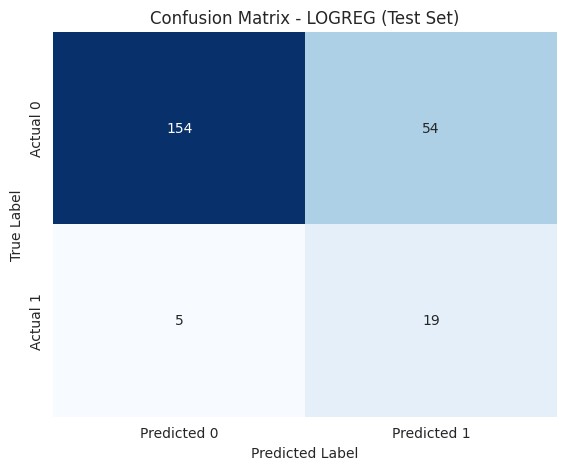

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Make predictions on the test set using the best model
y_pred = best_est.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6.5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - {best_name.upper()} (Test Set)')
plt.savefig(f"{RESULT_DIR}/{best_name}_confusion_matrix_test.png")
plt.show()

### Feature Importance

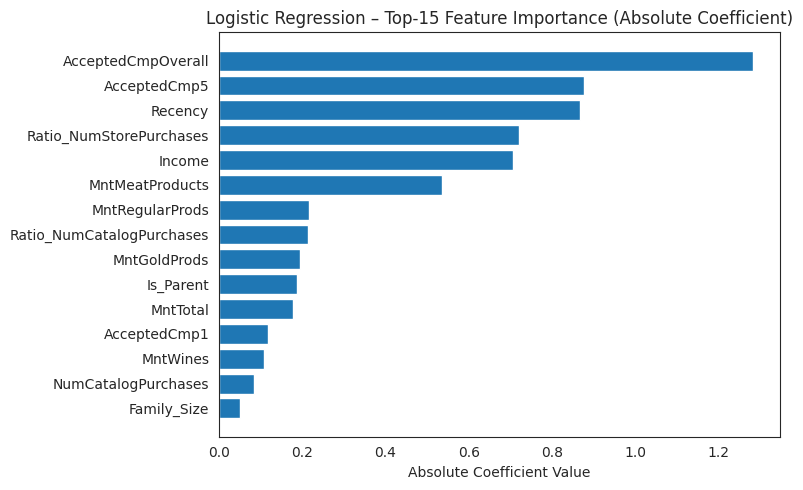


Logistic Regression – Top-15 Feature Importance (Absolute Coefficient)
                      feature  importance
0          AcceptedCmpOverall    1.283644
1                AcceptedCmp5    0.877843
2                     Recency    0.866662
3     Ratio_NumStorePurchases    0.720151
4                      Income    0.706131
5             MntMeatProducts    0.534565
6             MntRegularProds    0.216851
7   Ratio_NumCatalogPurchases    0.214263
8                MntGoldProds    0.194982
9                   Is_Parent    0.188199
10                   MntTotal    0.176925
11               AcceptedCmp1    0.116413
12                   MntWines    0.108764
13        NumCatalogPurchases    0.083014
14                Family_Size    0.049608


In [ ]:
# Feature Importance for Logistic Regression
if best_name == "logreg":
    logreg_est = best_est
    preprocessor = logreg_est.named_steps["preprocess"]
    logreg_clf = logreg_est.named_steps["clf"]

    # Lấy tên features sau tiền xử lý
    # Áp dụng bộ tiền xử lý cho một tập dữ liệu giả nhỏ để lấy tên features chính xác
    X_train_transformed_sample = preprocessor.transform(X_train.head())

    if hasattr(preprocessor, 'get_feature_names_out'):
        feat_names = list(preprocessor.get_feature_names_out())
    else:
        # Phương án dự phòng cho các phiên bản cũ hơn hoặc các bộ biến đổi phức tạp - thử tái tạo tên
        feat_names = []
        for name, transformer, cols in preprocessor.transformers_:
            if transformer != 'passthrough':
                 if hasattr(transformer, 'get_feature_names_out'):
                     try:
                         feat_names.extend(list(transformer.get_feature_names_out(cols)))
                     except:
                         feat_names.extend(list(cols)) # Dự phòng về tên cột gốc
                 else:
                     feat_names.extend(list(cols)) # Dự phòng về tên cột gốc
            else:
                feat_names.extend(list(cols)) # Passthrough sử dụng tên cột gốc


    # Lấy hệ số (coefficients) từ mô hình Logistic Regression và sử dụng giá trị tuyệt đối
    coefficients = logreg_clf.coef_[0] # Lấy hệ số cho lớp dương (thường là lớp 1)
    importances = np.abs(coefficients)

    # Đảm bảo số lượng importance khớp với số lượng tên feature
    if len(importances) != len(feat_names):
        print(f"Cảnh báo: Chiều dài importance ({len(importances)}) và chiều dài tên feature ({len(feat_names)}) không khớp. Đang thử tái tạo thủ công.")
        # Tái tạo thủ công dựa trên thứ tự dự kiến: num_cols theo sau bởi bin_cols
        reconstructed_feat_names = []
        reconstructed_feat_names.extend(num_cols) # Từ bộ biến đổi số
        reconstructed_feat_names.extend(bin_cols) # Từ passthrough nhị phân

        if len(importances) == len(reconstructed_feat_names):
             feat_names = reconstructed_feat_names
             print("Tái tạo tên feature thủ công thành công.")
        else:
            print("Tái tạo tên feature thủ công thất bại. Tên feature có thể không chính xác.")
            # Là phương án cuối cùng, tạo tên giả nếu chiều dài vẫn không khớp
            if len(importances) == len(num_cols) + len(bin_cols):
                 feat_names = num_cols + bin_cols
                 print("Đã sử dụng tên cột gốc làm tên feature.")
            else:
                 # Trường hợp này cho thấy sự không khớp đáng kể và cần kiểm tra thủ công
                 print("Không khớp nghiêm trọng giữa tên feature và importance. Không thể tiếp tục chính xác.")
                 feat_names = [f"feature_{i}" for i in range(len(importances))] # Tên giả
                 print("Đang sử dụng tên feature giả.")


    # Sắp xếp giảm dần & lấy Top-15
    fi_df = (pd.DataFrame({"feature": feat_names, "importance": importances})
             .sort_values("importance", ascending=False)
             .reset_index(drop=True))
    top15 = fi_df.head(15)

    # Vẽ bar chart Top-15 (để đưa vào báo cáo)
    plt.figure(figsize=(8, 5)) # Điều chỉnh kích thước biểu đồ để dễ đọc hơn
    plt.barh(top15["feature"][::-1], top15["importance"][::-1]) # Sử dụng barh cho thanh ngang
    plt.title("Logistic Regression – Top-15 Feature Importance (Absolute Coefficient)")
    plt.xlabel("Absolute Coefficient Value")
    plt.tight_layout()
    plt.savefig(f"{RESULT_DIR}/logreg_feature_importance_top15_horizontal.png") # Lưu với tên khác
    plt.show()

    # In nhanh ra màn hình
    print("\nLogistic Regression – Top-15 Feature Importance (Absolute Coefficient)")
    print(top15)
else:
    print(f"Feature importance calculation implemented only for Logistic Regression in this cell. Best model is {best_name}")

In [ ]:
"""# Dự đoán khả năng phản hồi (Future Response Prediction)"""

# Tạo biến dự đoán xác suất phản hồi
df["future_response_proba"] = best_est.predict_proba(X)[:, 1]

# Gán nhãn nhị phân dựa theo ngưỡng 0.5 (hoặc điều chỉnh theo ROC)
df["future_response"] = (df["future_response_proba"] >= 0.5).astype(int)

# Xuất ra file kết quả
output_path = os.path.join(RESULT_DIR, "cluster0_future_response.xlsx")
df.to_excel(output_path, index=False)

print(f"Future response predictions saved to: {output_path}")
print(df[["future_response_proba", "future_response"]].head())

Future response predictions saved to: cluster0_results/cluster0_future_response.xlsx
   future_response_proba  future_response
0               0.950912                1
1               0.228241                0
2               0.068088                0
3               0.330138                0
4               0.526312                1


## Cluster 1

In [ ]:
RESULT_DIR = "cluster1_results"
os.makedirs(RESULT_DIR, exist_ok=True)

In [ ]:
df = pd.read_excel("/content/iFood_cluster_1.xlsx")
print(df.shape)
df.head()

(716, 42)


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntRegularProds,...,Ratio_NumWebPurchases,Ratio_NumCatalogPurchases,Ratio_NumStorePurchases,MntWines_was_capped,MntMeatProducts_was_capped,MntRegularProds_was_capped,MntFishProducts_was_capped,MntSweetProducts_was_capped,MntFruits_was_capped,Cluster
0,71613,0,0,26,426.0,49.0,127,111.0,21.0,692,...,0.400000,0.100000,0.500000,0,0,0,0,0,0,1
1,82800,0,0,23,1006.0,22.0,115,59.0,68.0,1225,...,0.280000,0.240000,0.480000,0,0,0,0,0,0,1
2,76995,0,1,91,1012.0,79.5,498,0.0,16.0,1430,...,0.458333,0.166667,0.375000,0,0,0,0,0,1,1
3,65324,0,1,0,384.0,0.0,102,21.0,32.0,534,...,0.352941,0.117647,0.529412,0,0,0,0,0,0,1
4,84618,0,0,96,684.0,79.5,556,21.0,66.0,1672,...,0.240000,0.360000,0.400000,0,1,0,0,0,1,1


In [ ]:
FEATURES = [
    "AcceptedCmpOverall", "Ratio_NumStorePurchases", "MntTotal",
    "MntMeatProducts", "MntRegularProds", "Income", "AcceptedCmp5",
    "MntGoldProds", "MntWines", "Family_Size", "AcceptedCmp1",
    "Ratio_NumCatalogPurchases", "Is_Parent", "NumCatalogPurchases", "Recency"
]
TARGET = "Response"

X = df[FEATURES].copy()
y = df[TARGET].astype(int)

bin_cols = [c for c in ["AcceptedCmp1","AcceptedCmp5","AcceptedCmpOverall","Is_Parent"] if c in X.columns]
num_cols = [c for c in X.columns if c not in bin_cols]

### Train/Test split

In [ ]:
# Train/Test split (75/25) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=SEED
)

### Data Balancing using SMOTE

In [ ]:
# Kiểm tra lệch lớp
pos_ratio = y_train.mean()                           # Tỷ lệ mẫu lớp 1 trong train
minority_ratio = pos_ratio if pos_ratio < 0.5 else 1 - pos_ratio
USE_SMOTE = minority_ratio < 0.40                    # Nếu lớp nhỏ <40% → bật SMOTE
print(f"Tỷ lệ lớp thiểu số: {minority_ratio:.3f} → SMOTE? {USE_SMOTE}")

# Tiền xử lý dữ liệu
# - num_cols: điền median + chuẩn hóa (StandardScaler)
# - bin_cols: giữ nguyên (0/1)
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), num_cols),
    ("bin", "passthrough", bin_cols)
], remainder="drop", verbose_feature_names_out=False)
# Tạo pipeline huấn luyện ---
# Gồm bước tiền xử lý + (thêm SMOTE nếu mất cân bằng)
base_steps = [("preprocess", preprocessor)]
if USE_SMOTE:
    base_steps.append(("smote", SMOTE(random_state=SEED)))

Tỷ lệ lớp thiểu số: 0.236 → SMOTE? True


### Model Training and Best Model Selection

In [ ]:
# Định nghĩa 3 mô hình ---
models = {
    "logreg": (ImbPipeline(base_steps + [
        ("clf", LogisticRegression(max_iter=2000, solver="lbfgs", random_state=SEED))
    ]), {"clf__C": [0.5, 1.0, 2.0]}),

    "rf": (ImbPipeline(base_steps + [
        ("clf", RandomForestClassifier(random_state=SEED, n_estimators=400, n_jobs=-1))
    ]), {"clf__max_depth": [None, 10, 20], "clf__min_samples_split": [2, 5]}),

    "xgb": (ImbPipeline(base_steps + [
        ("clf", XGBClassifier(
            random_state=SEED, n_estimators=600, learning_rate=0.05,
            max_depth=4, subsample=0.9, colsample_bytree=0.9,
            eval_metric="logloss", n_jobs=-1, tree_method="hist"
        ))
    ]), {"clf__max_depth": [3, 4, 5], "clf__learning_rate": [0.03, 0.05, 0.1]})
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

def evaluate_on_test(model, name: str):
    proba = model.predict_proba(X_test)[:, 1]
    pred = (proba >= 0.5).astype(int)
    metrics = {
        "model": name,
        "roc_auc": roc_auc_score(y_test, proba),
        "pr_auc": average_precision_score(y_test, proba),
        "f1": f1_score(y_test, pred),
        "precision": precision_score(y_test, pred),
        "recall": recall_score(y_test, pred),
        "accuracy": accuracy_score(y_test, pred),
        "cm": confusion_matrix(y_test, pred).tolist()
    }
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"ROC - {name}"); plt.savefig(f"{RESULT_DIR}/{name}_ROC.png"); plt.close()
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"PR - {name}"); plt.savefig(f"{RESULT_DIR}/{name}_PR.png"); plt.close()
    return metrics

In [ ]:
# --- Huấn luyện + chọn mô hình tốt nhất ---
results = []
best_name, best_est, best_auc, best_f1 = None, None, -np.inf, -np.inf

for name, (pipe, grid) in models.items():
    print(f"\n=== {name.upper()} ===")
    gcv = GridSearchCV(pipe, grid, scoring="roc_auc", cv=cv, n_jobs=-1, refit=True, verbose=0)
    gcv.fit(X_train, y_train)
    est = gcv.best_estimator_
    m = evaluate_on_test(est, name)
    m["best_params"] = gcv.best_params_
    results.append(m)

    # Chọn model tốt nhất theo ROC-AUC (nếu bằng nhau thì theo F1)
    if (m["roc_auc"] > best_auc) or (np.isclose(m["roc_auc"], best_auc) and m["f1"] > best_f1):
        best_auc, best_f1, best_name, best_est = m["roc_auc"], m["f1"], name, est

# Tạo DataFrame tổng hợp
summary = pd.DataFrame(results).sort_values(["roc_auc", "f1"], ascending=False)
summary.to_csv(f"{RESULT_DIR}/model_summary.csv", index=False)

# --- In kết quả tóm tắt ---
print("\nSo sánh mô hình:")
print(summary[["model", "roc_auc", "f1", "precision", "recall", "accuracy"]])  # thêm precision + recall
print(f"\nBest model: {best_name}")


=== LOGREG ===

=== RF ===

=== XGB ===

So sánh mô hình:
    model   roc_auc        f1  precision    recall  accuracy
1      rf  0.865746  0.617284   0.641026  0.595238  0.826816
2     xgb  0.861661  0.575000   0.605263  0.547619  0.810056
0  logreg  0.857143  0.600000   0.517241  0.714286  0.776536

Best model: rf


### Confusion Matrix

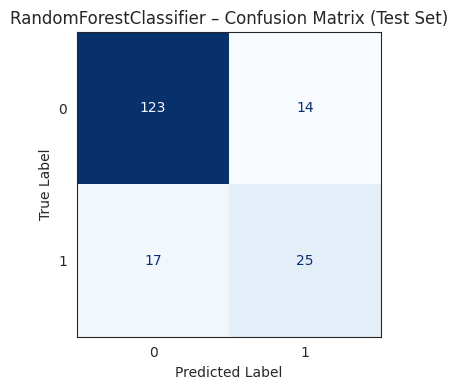

True Negatives: 123, False Positives: 14, False Negatives: 17, True Positives: 25
Accuracy : 0.827
Precision: 0.641
Recall   : 0.595
F1-score : 0.617


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- Confusion Matrix trực quan cho model tốt nhất  ---
best_model_name = best_est.named_steps["clf"].__class__.__name__
y_pred = best_est.predict(X_test)                             # Dự đoán trên tập test
cm = confusion_matrix(y_test, y_pred)                        # Tạo confusion matrix

# Vẽ trực tiếp trong notebook
plt.figure(figsize=(4.5, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues", values_format="d", ax=plt.gca(), colorbar=False)
plt.title(f"{best_model_name} – Confusion Matrix (Test Set)", fontsize=12)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# In thêm các chỉ số đánh giá nhanh
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall   : {recall_score(y_test, y_pred):.3f}")
print(f"F1-score : {f1_score(y_test, y_pred):.3f}")


### Feature Importance

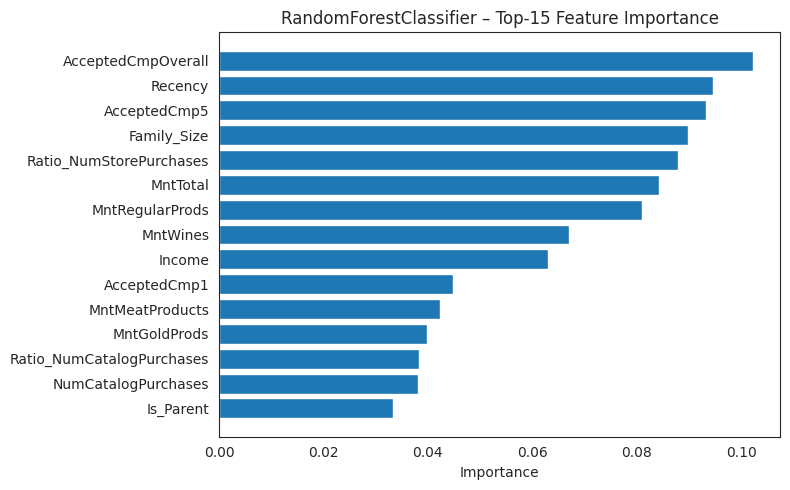

RandomForestClassifier – Top-15 Feature Importance
                      feature  importance
0          AcceptedCmpOverall    0.102343
1                     Recency    0.094718
2                AcceptedCmp5    0.093329
3                 Family_Size    0.089894
4     Ratio_NumStorePurchases    0.087917
5                    MntTotal    0.084250
6             MntRegularProds    0.081102
7                    MntWines    0.066952
8                      Income    0.063034
9                AcceptedCmp1    0.044735
10            MntMeatProducts    0.042381
11               MntGoldProds    0.039819
12  Ratio_NumCatalogPurchases    0.038213
13        NumCatalogPurchases    0.038014
14                  Is_Parent    0.033300


In [ ]:
# Feature Importance cho best model
model_est = best_est
feat_names = model_est.named_steps["preprocess"].get_feature_names_out()

# Lấy importance từ mô hình XGB
model_clf = model_est.named_steps["clf"]
importances = model_clf.feature_importances_

# Sắp xếp giảm dần & lấy Top-15
fi_df = (pd.DataFrame({"feature": feat_names, "importance": importances})
         .sort_values("importance", ascending=False)
         .reset_index(drop=True))
top15 = fi_df.head(15)

# Vẽ bar chart Top-15 (để đưa vào báo cáo)
plt.figure(figsize=(8,5))
plt.barh(top15["feature"][::-1], top15["importance"][::-1])
plt.title(f"{best_model_name} – Top-15 Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# In nhanh ra màn hình
print(f"{best_model_name} – Top-15 Feature Importance")
print(top15)

In [ ]:
"""# Dự đoán khả năng phản hồi (Future Response Prediction)"""

# Tạo biến dự đoán xác suất phản hồi
df["future_response_proba"] = best_est.predict_proba(X)[:, 1]

# Gán nhãn nhị phân dựa theo ngưỡng 0.5 (hoặc điều chỉnh theo ROC)
df["future_response"] = (df["future_response_proba"] >= 0.5).astype(int)

# Xuất ra file kết quả
output_path = os.path.join(RESULT_DIR, "cluster1_future_response.xlsx")
df.to_excel(output_path, index=False)

print(f"Future response predictions saved to: {output_path}")
print(df[["future_response_proba", "future_response"]].head())

Future response predictions saved to: cluster1_results/cluster1_future_response.xlsx
   future_response_proba  future_response
0                 0.0100                0
1                 0.9725                1
2                 0.4000                0
3                 0.0275                0
4                 0.0275                0


## Cluster 2

In [ ]:
RESULT_DIR = "cluster2_results"
os.makedirs(RESULT_DIR, exist_ok=True)

In [ ]:
df = pd.read_excel("/content/iFood_cluster_2.xlsx")
print(df.shape)
df.head()

(718, 42)


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntRegularProds,...,Ratio_NumWebPurchases,Ratio_NumCatalogPurchases,Ratio_NumStorePurchases,MntWines_was_capped,MntMeatProducts_was_capped,MntRegularProds_was_capped,MntFishProducts_was_capped,MntSweetProducts_was_capped,MntFruits_was_capped,Cluster
0,26646,1,0,26,11,4.0,20,10.0,3.0,43,...,0.333333,0.0,0.666667,0,0,0,0,0,0,2
1,33454,1,0,32,76,10.0,56,3.0,1.0,123,...,0.500000,0.0,0.500000,0,0,0,0,0,0,2
2,30351,1,0,19,14,0.0,24,3.0,3.0,42,...,0.600000,0.0,0.400000,0,0,0,0,0,0,2
3,5648,1,1,68,28,0.0,6,1.0,1.0,23,...,1.000000,0.0,0.000000,0,0,0,0,0,0,2
4,7500,0,0,59,6,16.0,11,11.0,1.0,29,...,0.400000,0.0,0.600000,0,0,0,0,0,0,2


In [ ]:
FEATURES = [
    "AcceptedCmpOverall", "Ratio_NumStorePurchases", "MntTotal",
    "MntMeatProducts", "MntRegularProds", "Income", "AcceptedCmp5",
    "MntGoldProds", "MntWines", "Family_Size", "AcceptedCmp1",
    "Ratio_NumCatalogPurchases", "Is_Parent", "NumCatalogPurchases", "Recency"
]
TARGET = "Response"

X = df[FEATURES].copy()
y = df[TARGET].astype(int)

bin_cols = [c for c in ["AcceptedCmp1","AcceptedCmp5","AcceptedCmpOverall","Is_Parent"] if c in X.columns]
num_cols = [c for c in X.columns if c not in bin_cols]

### Train/Test split

In [ ]:
# Train/Test split (70/30) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=SEED
)

### Data Balancing using SMOTE

In [ ]:
# Kiểm tra lệch lớp
pos_ratio = y_train.mean()                           # Tỷ lệ mẫu lớp 1 trong train
minority_ratio = pos_ratio if pos_ratio < 0.5 else 1 - pos_ratio
USE_SMOTE = minority_ratio < 0.40                    # Nếu lớp nhỏ <40% → bật SMOTE
print(f"Tỷ lệ lớp thiểu số: {minority_ratio:.3f} → SMOTE? {USE_SMOTE}")

# Tiền xử lý dữ liệu
# - num_cols: điền median + chuẩn hóa (StandardScaler)
# - bin_cols: giữ nguyên (0/1)
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), num_cols),
    ("bin", "passthrough", bin_cols)
], remainder="drop", verbose_feature_names_out=False)
# Tạo pipeline huấn luyện ---
# Gồm bước tiền xử lý + (thêm SMOTE nếu mất cân bằng)
base_steps = [("preprocess", preprocessor)]
if USE_SMOTE:
    base_steps.append(("smote", SMOTE(random_state=SEED)))

Tỷ lệ lớp thiểu số: 0.116 → SMOTE? True


### Model Training and Best Model Selection

In [ ]:
# Định nghĩa 3 mô hình ---
models = {
    "logreg": (ImbPipeline(base_steps + [
        ("clf", LogisticRegression(max_iter=2000, solver="lbfgs", random_state=SEED))
    ]), {"clf__C": [0.5, 1.0, 2.0]}),

    "rf": (ImbPipeline(base_steps + [
        ("clf", RandomForestClassifier(random_state=SEED, n_estimators=400, n_jobs=-1))
    ]), {"clf__max_depth": [None, 10, 20], "clf__min_samples_split": [2, 5]}),

    "xgb": (ImbPipeline(base_steps + [
        ("clf", XGBClassifier(
            random_state=SEED, n_estimators=600, learning_rate=0.05,
            max_depth=4, subsample=0.9, colsample_bytree=0.9,
            eval_metric="logloss", n_jobs=-1, tree_method="hist"
        ))
    ]), {"clf__max_depth": [3, 4, 5], "clf__learning_rate": [0.03, 0.05, 0.1]})
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

def evaluate_on_test(model, name: str):
    proba = model.predict_proba(X_test)[:, 1]
    pred = (proba >= 0.5).astype(int)
    metrics = {
        "model": name,
        "roc_auc": roc_auc_score(y_test, proba),
        "pr_auc": average_precision_score(y_test, proba),
        "f1": f1_score(y_test, pred),
        "precision": precision_score(y_test, pred),
        "recall": recall_score(y_test, pred),
        "accuracy": accuracy_score(y_test, pred),
        "cm": confusion_matrix(y_test, pred).tolist()
    }
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"ROC - {name}"); plt.savefig(f"{RESULT_DIR}/{name}_ROC.png"); plt.close()
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"PR - {name}"); plt.savefig(f"{RESULT_DIR}/{name}_PR.png"); plt.close()
    return metrics

In [ ]:
# --- Huấn luyện + chọn mô hình tốt nhất ---
results = []
best_name, best_est, best_auc, best_f1 = None, None, -np.inf, -np.inf

for name, (pipe, grid) in models.items():
    print(f"\n=== {name.upper()} ===")
    gcv = GridSearchCV(pipe, grid, scoring="roc_auc", cv=cv, n_jobs=-1, refit=True, verbose=0)
    gcv.fit(X_train, y_train)
    est = gcv.best_estimator_
    m = evaluate_on_test(est, name)
    m["best_params"] = gcv.best_params_
    results.append(m)

    # Chọn model tốt nhất theo ROC-AUC (nếu bằng nhau thì theo F1)
    if (m["roc_auc"] > best_auc) or (np.isclose(m["roc_auc"], best_auc) and m["f1"] > best_f1):
        best_auc, best_f1, best_name, best_est = m["roc_auc"], m["f1"], name, est

# Tạo DataFrame tổng hợp
summary = pd.DataFrame(results).sort_values(["roc_auc", "f1"], ascending=False)
summary.to_csv(f"{RESULT_DIR}/model_summary.csv", index=False)

# --- In kết quả tóm tắt ---
print("\nSo sánh mô hình:")
print(summary[["model", "roc_auc", "f1", "precision", "recall", "accuracy"]])  # thêm precision + recall
print(f"\nBest model: {best_name}")


=== LOGREG ===

=== RF ===

=== XGB ===

So sánh mô hình:
    model   roc_auc        f1  precision  recall  accuracy
1      rf  0.845759  0.571429   0.583333    0.56  0.902778
2     xgb  0.825864  0.509091   0.466667    0.56  0.875000
0  logreg  0.819162  0.430380   0.314815    0.68  0.791667

Best model: rf


### Confusion Matrix

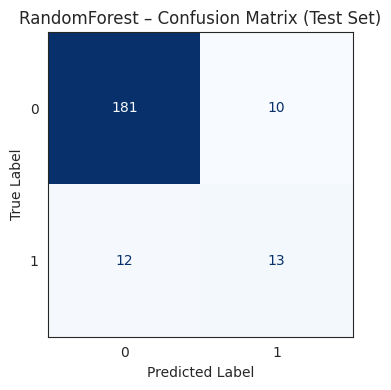

True Negatives: 181, False Positives: 10, False Negatives: 12, True Positives: 13
Accuracy : 0.898
Precision: 0.565
Recall   : 0.520
F1-score : 0.542


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- Confusion Matrix trực quan cho RandomForest ---
rf_pred = best_est.predict(X_test)                             # Dự đoán trên tập test
cm = confusion_matrix(y_test, rf_pred)                        # Tạo confusion matrix

# Vẽ trực tiếp trong notebook
plt.figure(figsize=(4.5, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues", values_format="d", ax=plt.gca(), colorbar=False)
plt.title("RandomForest – Confusion Matrix (Test Set)", fontsize=12)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# In thêm các chỉ số đánh giá nhanh
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
print(f"Accuracy : {accuracy_score(y_test, rf_pred):.3f}")
print(f"Precision: {precision_score(y_test, rf_pred):.3f}")
print(f"Recall   : {recall_score(y_test, rf_pred):.3f}")
print(f"F1-score : {f1_score(y_test, rf_pred):.3f}")

### Feature Importance

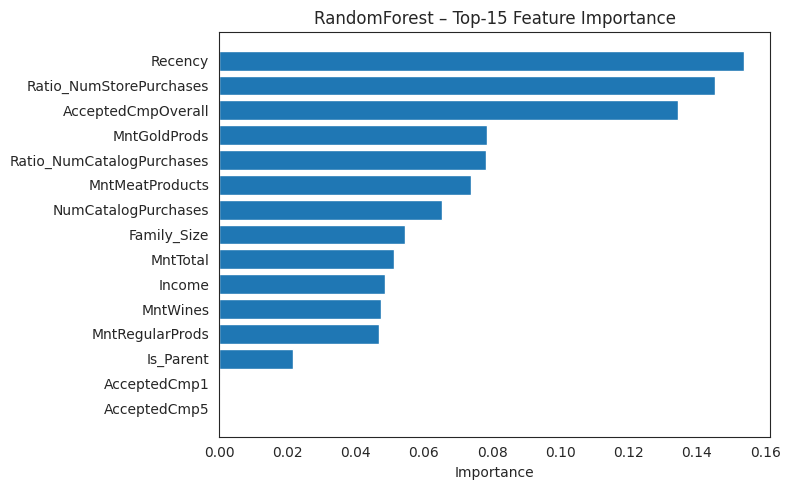

RF – Top-15 Feature Importance
                      feature  importance
0                     Recency    0.153799
1     Ratio_NumStorePurchases    0.145211
2          AcceptedCmpOverall    0.134356
3                MntGoldProds    0.078480
4   Ratio_NumCatalogPurchases    0.078154
5             MntMeatProducts    0.073929
6         NumCatalogPurchases    0.065437
7                 Family_Size    0.054396
8                    MntTotal    0.051371
9                      Income    0.048753
10                   MntWines    0.047347
11            MntRegularProds    0.046901
12                  Is_Parent    0.021683
13               AcceptedCmp1    0.000183
14               AcceptedCmp5    0.000000


In [ ]:
# Feature Importance cho RandomForest
rf_est = best_est
feat_names = rf_est.named_steps["preprocess"].get_feature_names_out()

# Lấy importance từ mô hình RF
rf_clf = rf_est.named_steps["clf"]
importances = rf_clf.feature_importances_

# Sắp xếp giảm dần & lấy Top-15
fi_df = (pd.DataFrame({"feature": feat_names, "importance": importances})
         .sort_values("importance", ascending=False)
         .reset_index(drop=True))
top15 = fi_df.head(15)

# Vẽ bar chart Top-15 (để đưa vào báo cáo)
plt.figure(figsize=(8,5))
plt.barh(top15["feature"][::-1], top15["importance"][::-1])
plt.title("RandomForest – Top-15 Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# In nhanh ra màn hình
print("RF – Top-15 Feature Importance")
print(top15)

In [ ]:
"""# Dự đoán khả năng phản hồi (Future Response Prediction)"""

# Tạo biến dự đoán xác suất phản hồi
df["future_response_proba"] = best_est.predict_proba(X)[:, 1]

# Gán nhãn nhị phân dựa theo ngưỡng 0.5 (hoặc điều chỉnh theo ROC)
df["future_response"] = (df["future_response_proba"] >= 0.5).astype(int)

# Xuất ra file kết quả
output_path = os.path.join(RESULT_DIR, "cluster2_future_response.xlsx")
df.to_excel(output_path, index=False)

print(f"Future response predictions saved to: {output_path}")
print(df[["future_response_proba", "future_response"]].head())


Future response predictions saved to: cluster2_results/cluster2_future_response.xlsx
   future_response_proba  future_response
0               0.044333                0
1               0.110000                0
2               0.566030                1
3               0.100000                0
4               0.005000                0
